<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%8B%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B9_%D0%BA%D0%B0%D1%80%D1%82%D1%8B_%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## План

1) Загрузите данные

2) Опишите задачу словами. В том числе напишите, что значит каждый признак

3) Разбейте данные на обучающую и тестовую выборки

4) Визуализируйте данные из обучающей выборки. В частности, имеет смысл построить диаграммы рассеивания для количественных признаков. Построить гистограммы распределений и т.п. Вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретируйте результаты

5) Обработать пропущенные значения (или убедиться, что их нет)

6) Исключить нерелевантные признаки (объяснить, как вы их нашли)

7) Если необходимо, то обработать коррелированные признаки

8) Обработать категориальные признаки

9) Провести масштабирование (или объяснить, почему в вашем случае она не нужна)

10) Вам может понадобиться другая предобработка. Например, если в вашем датасете есть текстовые признаки с уникальными значениями (например, аннотации товаров, отзывы пользователей, другие тексты), как в двух последних датасетах из перечисленных, то вам понадобится этап извлечения признаков, т.е. простые методы NLP, как, например, bag-of-words. Воспользуйтесь библиотеками re, nltk

11) После шагов 5–10 разумно вернутся к шагу 4 (а может, возвращаться к нему после каждого из этапов 5–10.

12) Попробуйте как минимум 3 метода классификации (регрессии). Объясните ваш выбор. Найдите значения метрик на обучающей и тестовой выборке. Сделайте вывод.

13) На одном из методов (объясните выбор) найдите оптимальное значение параметров. Постройте график зависимости ошибок (на обучающей выборке и валидационной/CV) от значения гиперпарамтра. Для найденного оптимального значения параметра (параметров) снова обучите модель. Сделайте вывод.

14) Довольны ли вы результатами? В частности, если классы не сбалансированы, то результат может оказаться неприемлемым. В этом случае можете применить методы балансировки из библиотеки imbalanced-learn.

15)Сделать общие выводы

## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Загрузка данных

In [18]:
!wget -O AER_credit_card_data.csv https://raw.githubusercontent.com/SedyaPrograms/Tutorial/main/AI%20and%20machine%20learning/dataset/AER_credit_card_data.csv

--2023-04-11 09:33:51--  https://raw.githubusercontent.com/SedyaPrograms/Tutorial/main/AI%20and%20machine%20learning/dataset/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2023-04-11 09:33:51 (5.52 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [19]:
df = pd.read_csv('AER_credit_card_data.csv')

## 2) Опишите задачу словами. В том числе напишите, что значит каждый признак

Задача: на основе загруженного дата-сета получить программу, которая верно ответит на вопрос: "можно ли выдавать кред. карту" на основе входных данных

Входные данные:

"карточка" - результат: 1, если заявка на получение кредитной карты принята, 0, если нет

"отчеты" - Количество серьезных уничижительных сообщений

"возраст" - Возраст n лет плюс двенадцать частей года

"доход" -  Годовой доход (деленный на 10 000)

"доля" -  Отношение ежемесячных расходов по кредитной карте к годовому доходу

"расходы" - Среднемесячные расходы по кредитной карте

"владелец" - 1, если владеет своим домом, 0, если 

"самостоятельная оплата" - 1, если работает не по найму, 0, если нет.

"иждивенцы" - лицо, находящееся на длительном или постоянном материальном или денежном обеспечении со стороны других лиц

"месяцы" -  Месяцы проживания по текущему адресу

"основные карточки" - Количество активных основных кредитных карт

"активные" - Количество активных кредитных счетов

In [20]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


## 3) Разбейте данные на обучающую и тестовую выборки

Замена Yes, No на 1 и 0 соответсвенно 

In [21]:
data_set = df.to_numpy()
data_set = np.array(data_set)
data_set[data_set == 'yes' ] = 1
data_set[data_set == 'no' ] = 0

In [22]:
data_set

array([[1, 0, 37.66667, ..., 54, 1, 12],
       [1, 0, 33.25, ..., 34, 1, 13],
       [1, 0, 33.66667, ..., 58, 1, 5],
       ...,
       [1, 0, 40.58333, ..., 1, 1, 2],
       [1, 0, 32.83333, ..., 60, 1, 7],
       [1, 0, 48.25, ..., 2, 1, 0]], dtype=object)

Разделяем колонку результата от параметров, влияющих на решение

In [23]:
cards_result = data_set[:, 0] # присваиваем первый стобец
cards_result= list(map(int, cards_result))
cards_result= np.array(cards_result)  
fithers = data_set
fithers  = np.array(fithers)  
fithers = np.delete(fithers, 0 ,axis=1) # "карточка"
cards_result, fithers

(array([1, 1, 1, ..., 1, 1, 1]),
 array([[0, 37.66667, 4.52, ..., 54, 1, 12],
        [0, 33.25, 2.42, ..., 34, 1, 13],
        [0, 33.66667, 4.5, ..., 58, 1, 5],
        ...,
        [0, 40.58333, 4.6, ..., 1, 1, 2],
        [0, 32.83333, 3.7, ..., 60, 1, 7],
        [0, 48.25, 3.7, ..., 2, 1, 0]], dtype=object))

можно удалить какие-то стобцы

In [24]:
#fithers = np.delete(fithers, 10,axis=1)  #  "активны"
#fithers = np.delete(fithers, 9 ,axis=1) # "основные карточки",
#fithers = np.delete(fithers, 8 ,axis=1) #  "месяцы",
#fithers = np.delete(fithers, 7 ,axis=1) # "иждивенцы",
#fithers = np.delete(fithers, 6 ,axis=1) # "самостоятельная оплата"
#fithers = np.delete(fithers, 5 ,axis=1) #"владелец",
#fithers = np.delete(fithers, 4 ,axis=1) # "расходы",
#fithers = np.delete(fithers, 3 ,axis=1) # "доля", 
#fithers = np.delete(fithers, 2 ,axis=1) # "доход",
#fithers = np.delete(fithers, 1 ,axis=1) # "возраст",
#fithers = np.delete(fithers, 0 ,axis=1) # "отчеты",

In [25]:
fithers = fithers.tolist()
for i in range(len(fithers)):
  fithers[i] = list(map(float, fithers[i]))
fithers  = np.array(fithers)  

теперь надо разделить на тренировочные и тестовые данные

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fithers, cards_result,
                                                    test_size=0.1)

In [27]:
y_train.shape, y_test.shape 

((1187,), (132,))

In [28]:
X_train.shape, X_test.shape 

((1187, 11), (132, 11))

# 4) Визуализация

Визуализируйте данные из обучающей выборки. В частности, имеет смысл построить диаграммы рассеивания для количественных признаков. Построить гистограммы распределений и т.п. Вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретируйте результаты

## основные характеристики

In [47]:
for i in range(len(fithers[0])):
  print(df.columns[i+1])
  print("Среднее = ", np.average(fithers[:, i]))
  print("Дисперсия = ", np.var(fithers[:, i]))

reports
Среднее =  0.4564063684609553
Дисперсия =  1.8083725293301784
age
Среднее =  33.21310325496589
Дисперсия =  102.79805463091692
income
Среднее =  3.3653760424564068
Дисперсия =  2.8671277366360433
share
Среднее =  0.06873217313987869
Дисперсия =  0.008952883254501517
expenditure
Среднее =  185.05707077839273
Дисперсия =  74046.9577391489
owner
Среднее =  0.4404852160727824
Дисперсия =  0.24645799049409656
selfemp
Среднее =  0.06899166034874905
Дисперсия =  0.0642318111510719
dependents
Среднее =  0.9939347990902199
Дисперсия =  1.5556872466965288
months
Среднее =  55.26762699014405
Дисперсия =  4388.6145016470655
majorcards
Среднее =  0.8172858225928734
Дисперсия =  0.14932970678156365
active
Среднее =  6.99696739954511
Дисперсия =  39.73312196330416


## Кор. матрица

Число ближе к 1, что означает, что эти две функции сильно коррелированы.

-1 указывает на совершенно отрицательную линейную корреляцию.

0 указывает на отсутствие линейной корреляции.

1 указывает на абсолютно положительную линейную корреляцию.

In [84]:
df.corr()
corr = df.corr() * 100
corr.style.background_gradient(cmap='bwr')

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,100.000000,4.408851,1.102287,-15.901079,-13.653760,1.973090,4.896762,-0.730356,20.775502
age,4.408851,100.000000,32.465320,-11.569704,1.494770,21.214643,43.642554,0.977669,18.106971
income,1.102287,32.465320,100.000000,-5.442926,28.110402,31.760130,13.034627,10.713778,18.054026
share,-15.901079,-11.569704,-5.442926,100.000000,83.877932,-8.261776,-5.534756,5.146956,-2.347440
expenditure,-13.653760,1.494770,28.110402,83.877932,100.000000,5.266406,-2.900660,7.751381,5.472424
dependents,1.973090,21.214643,31.760130,-8.261776,5.266406,100.000000,4.651197,1.028454,10.713276
months,4.896762,43.642554,13.034627,-5.534756,-2.900660,4.651197,100.000000,-4.144688,10.002764
majorcards,-0.730356,0.977669,10.713778,5.146956,7.751381,1.028454,-4.144688,100.000000,11.960278
active,20.775502,18.106971,18.054026,-2.347440,5.472424,10.713276,10.002764,11.960278,100.000000


## диаграммы рассеивания

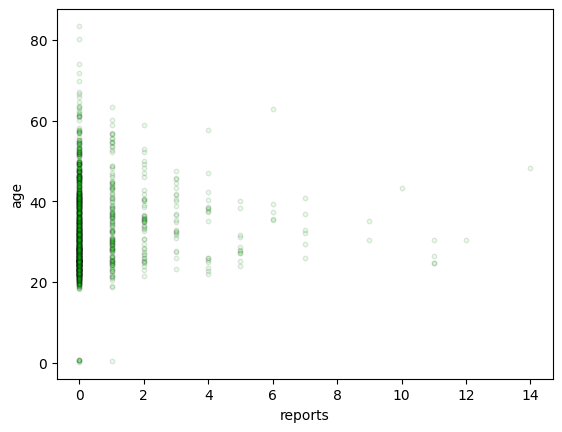

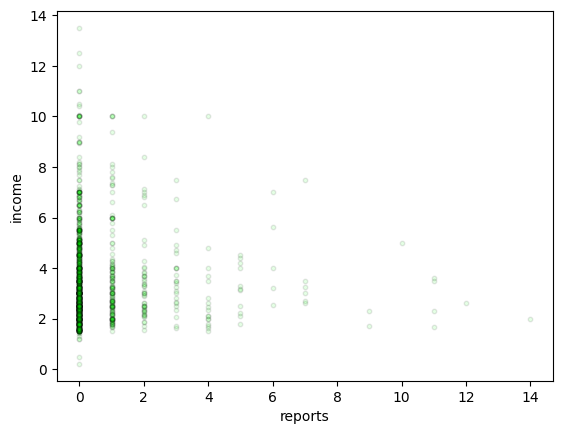

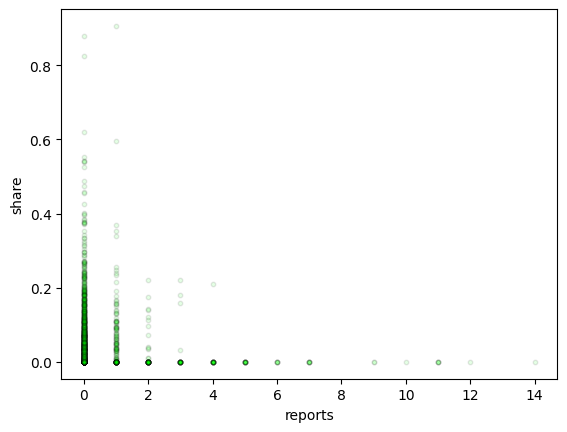

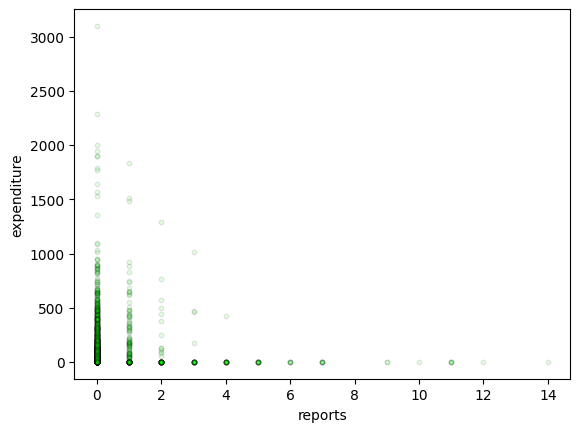

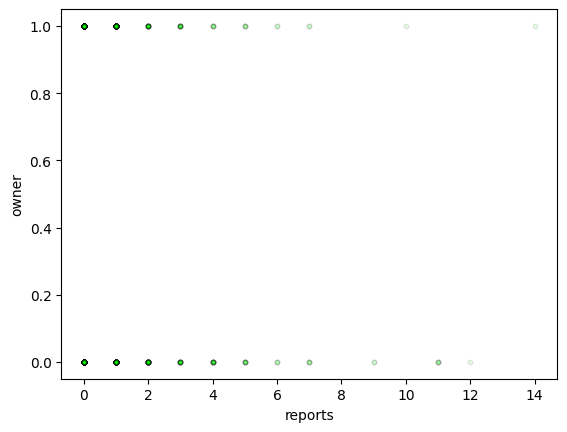

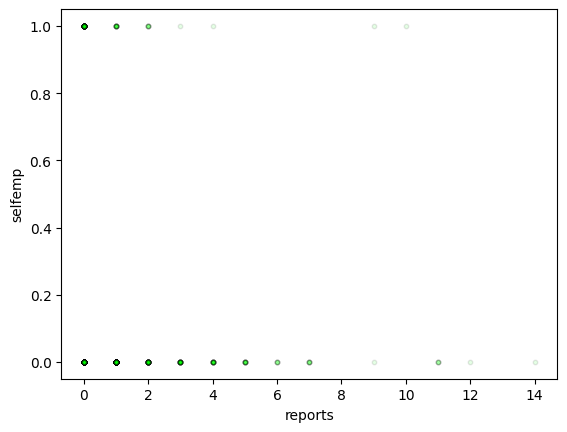

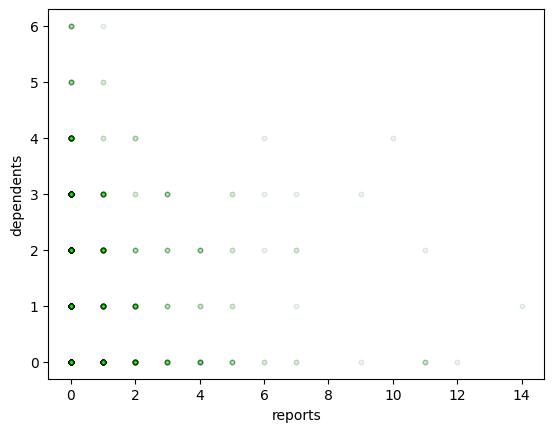

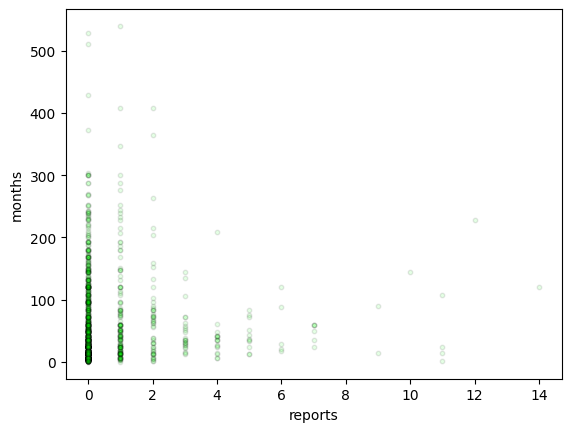

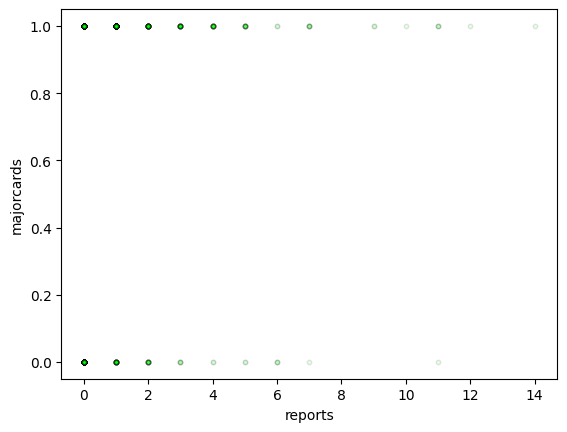

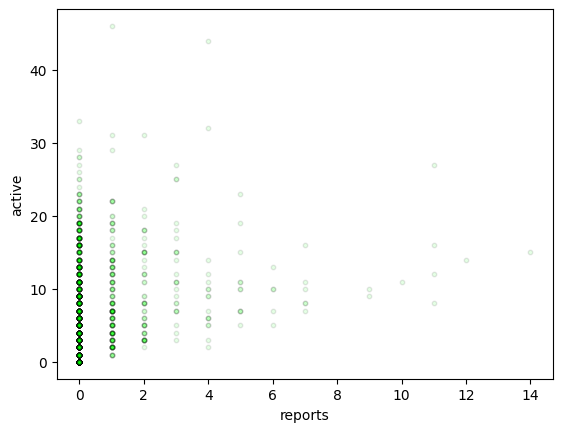

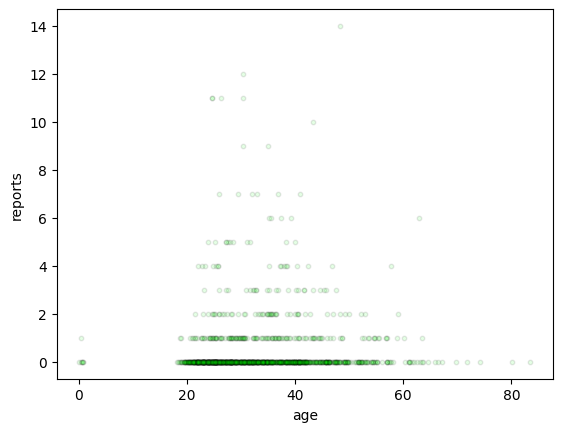

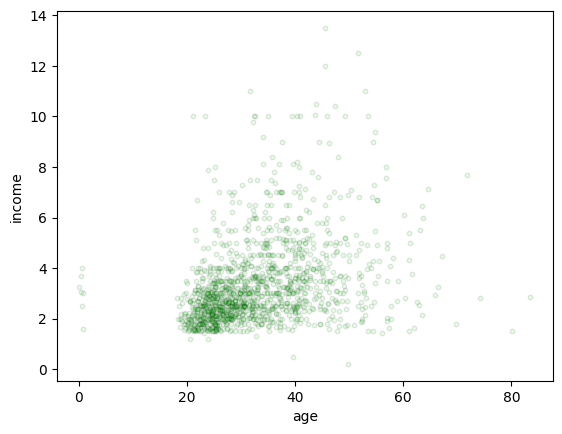

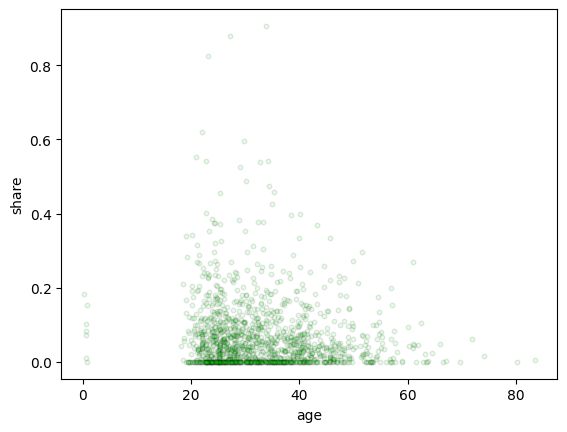

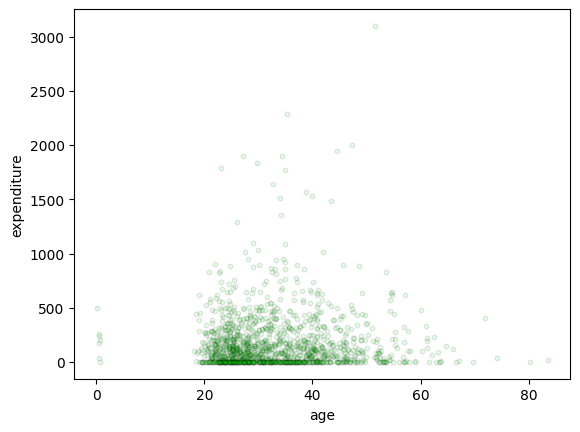

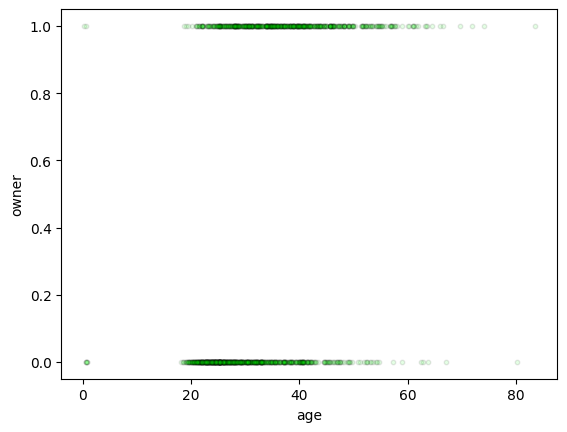

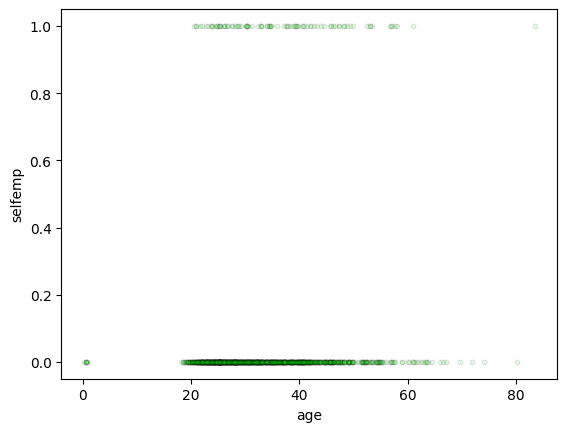

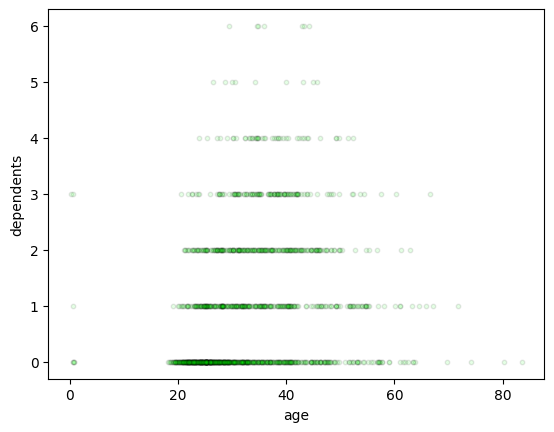

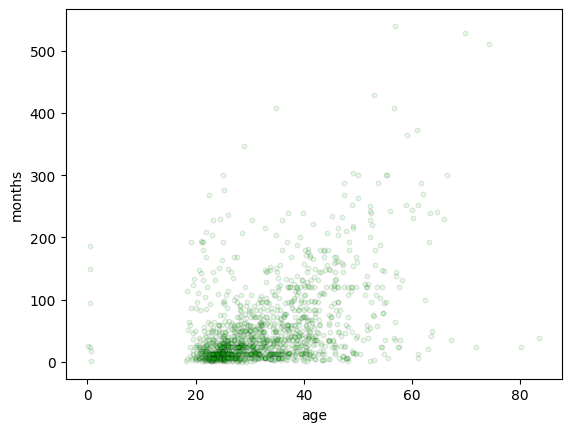

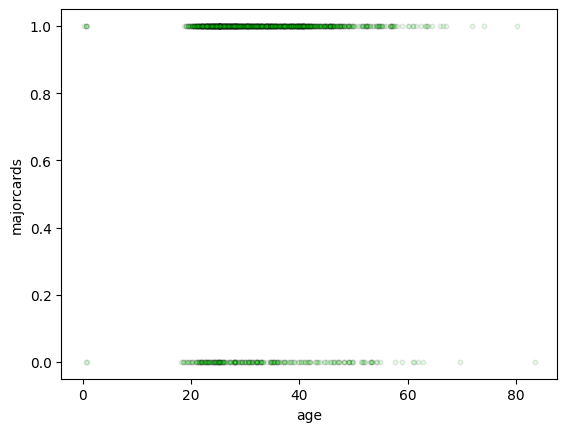

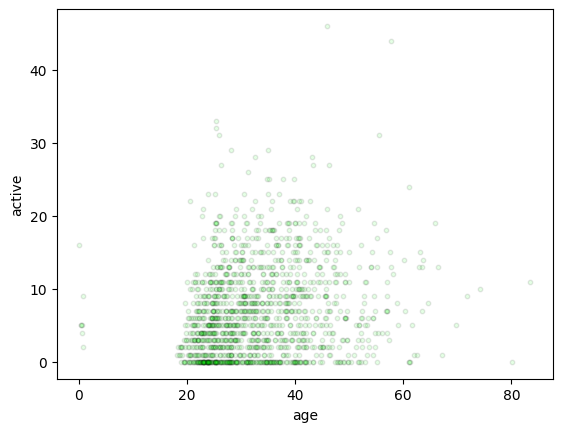

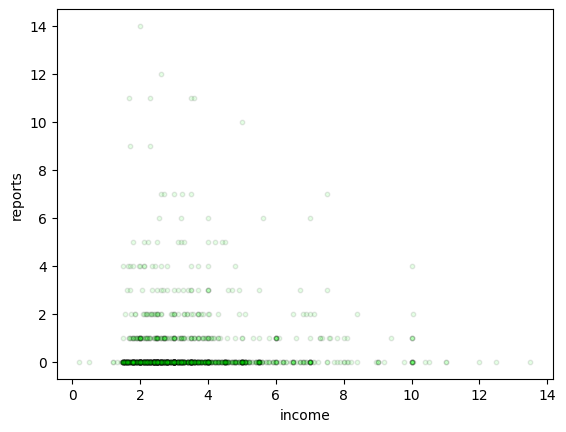

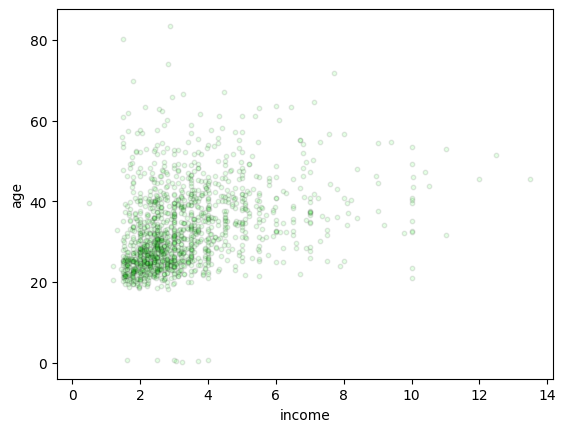

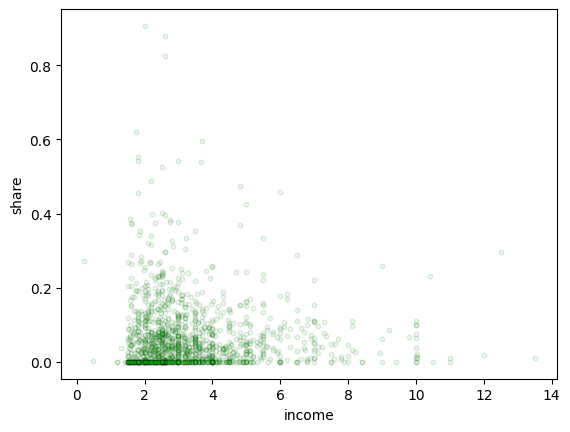

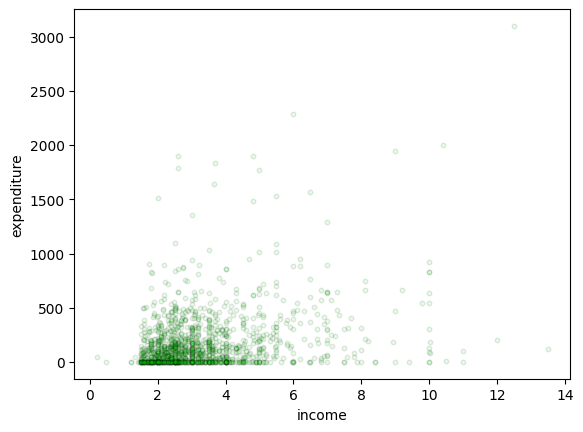

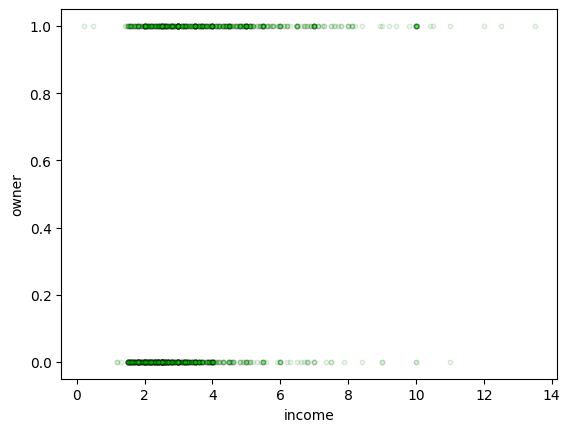

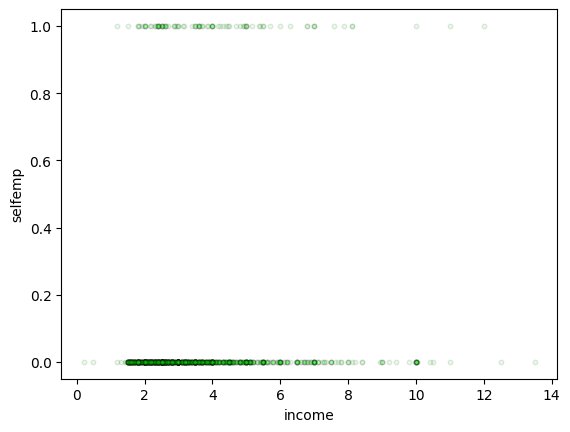

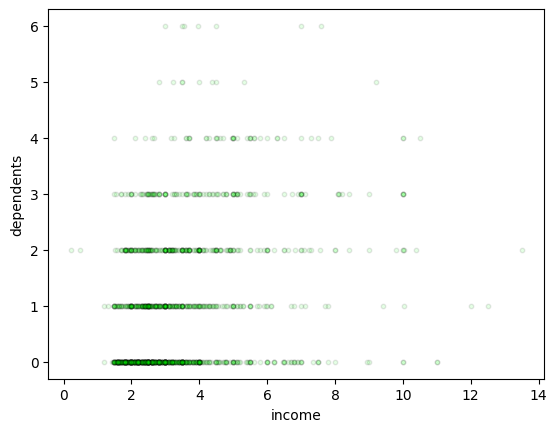

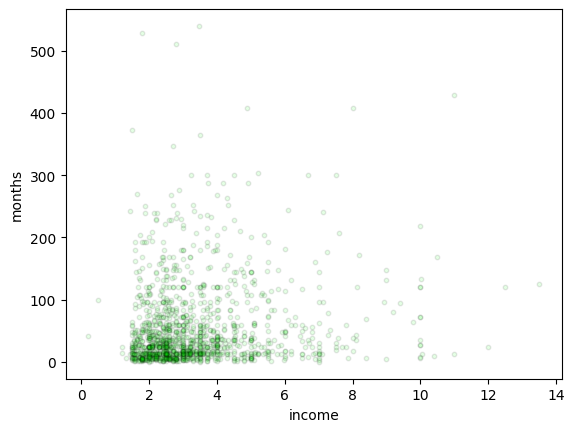

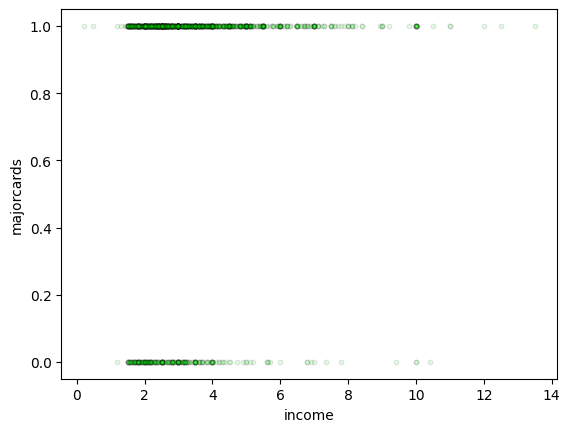

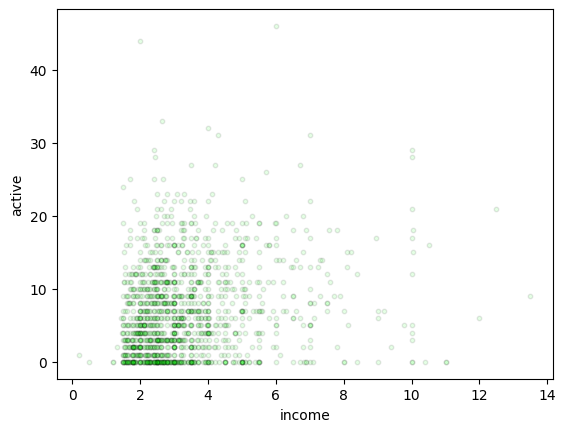

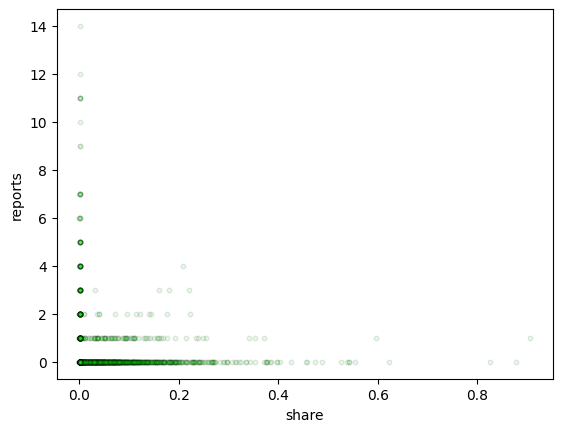

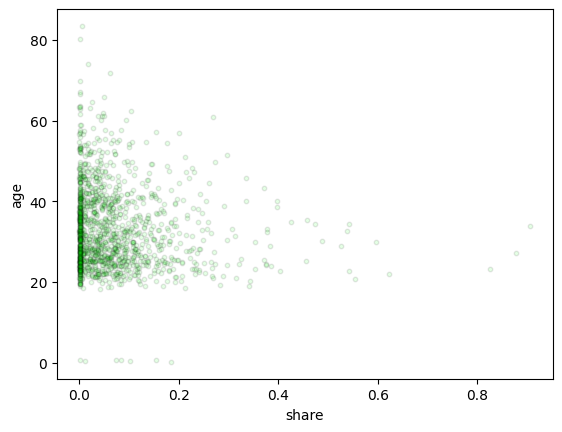

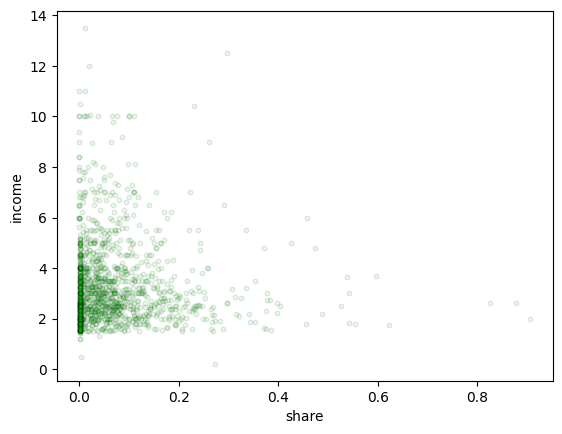

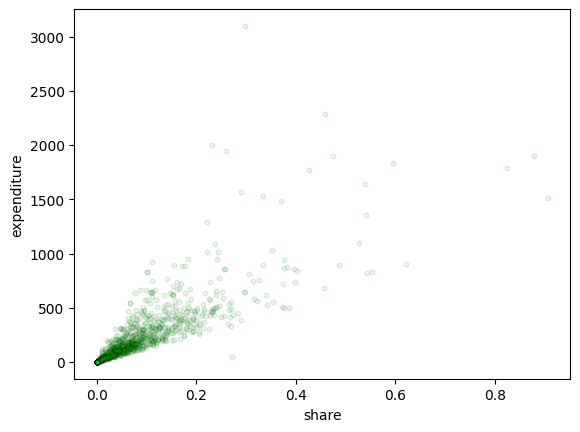

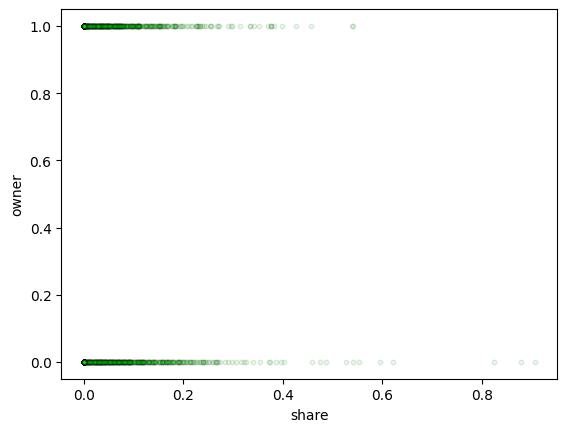

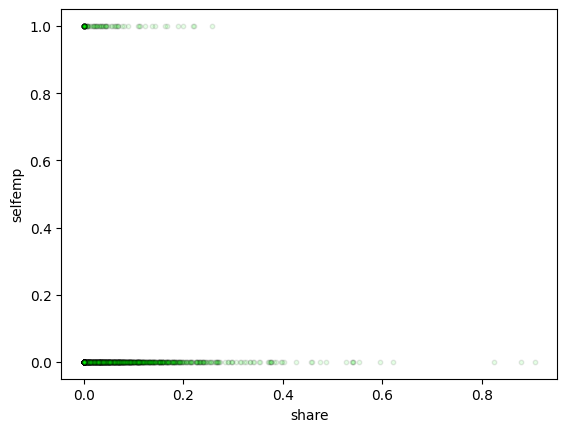

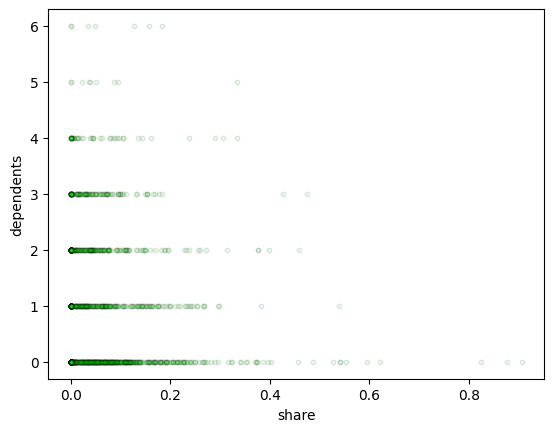

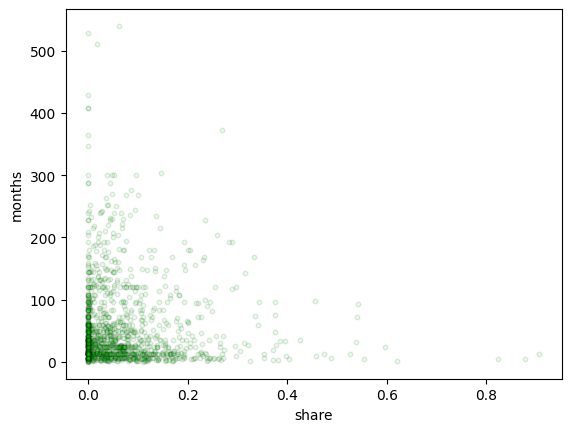

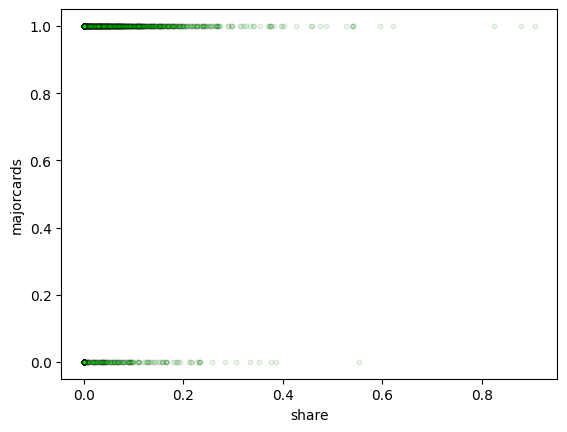

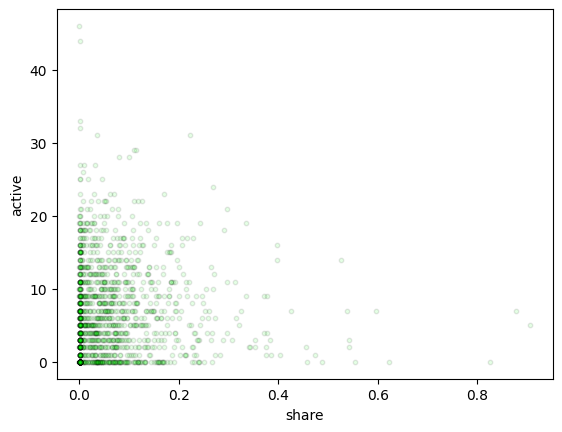

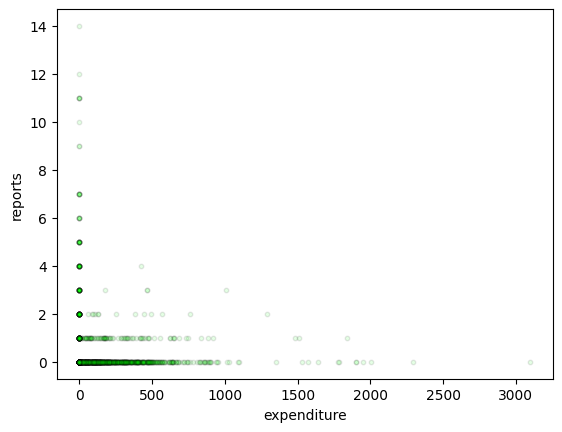

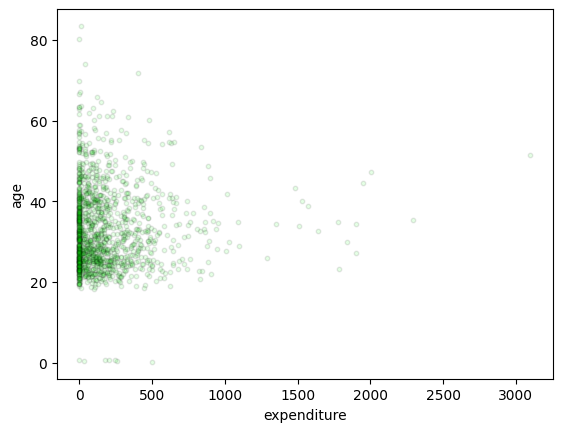

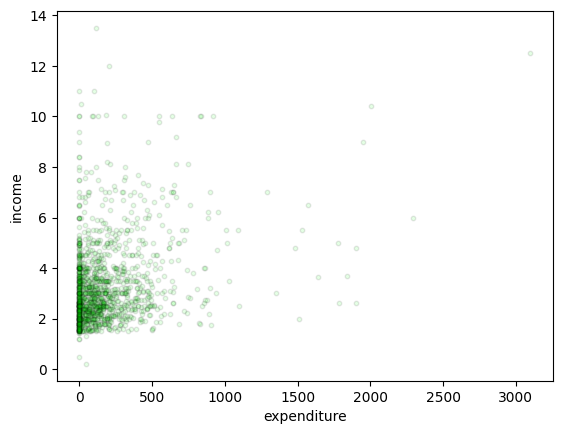

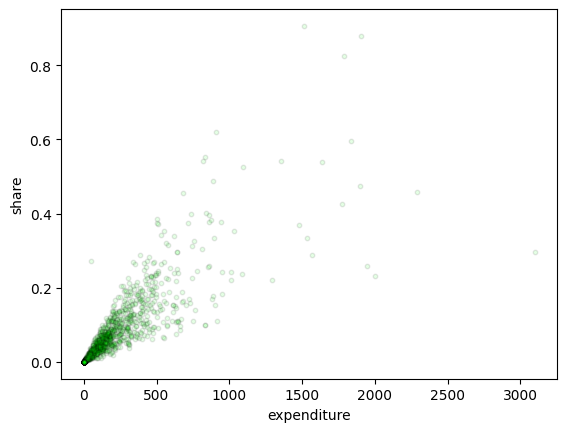

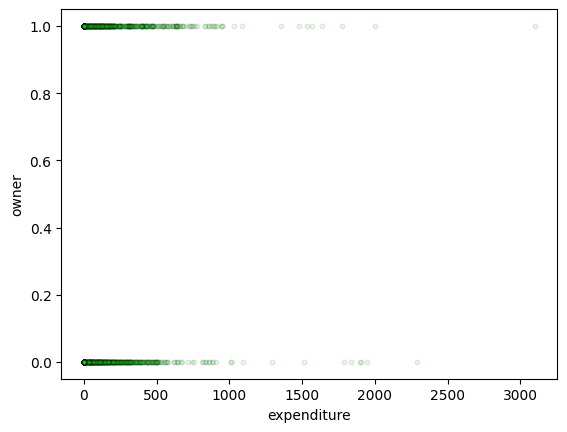

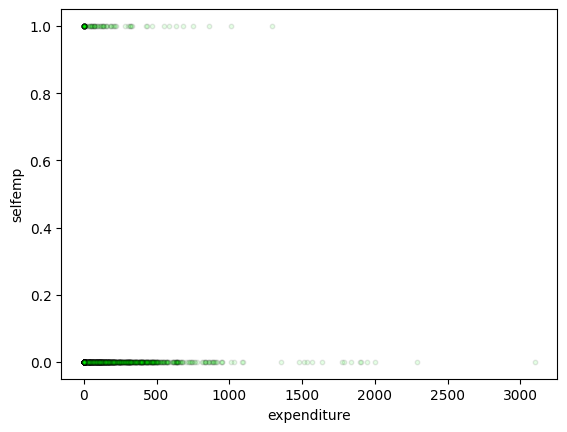

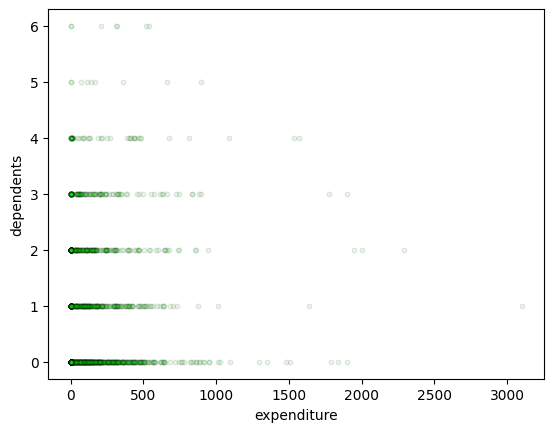

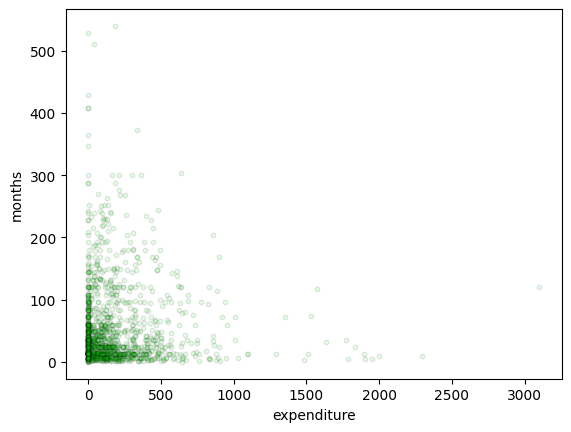

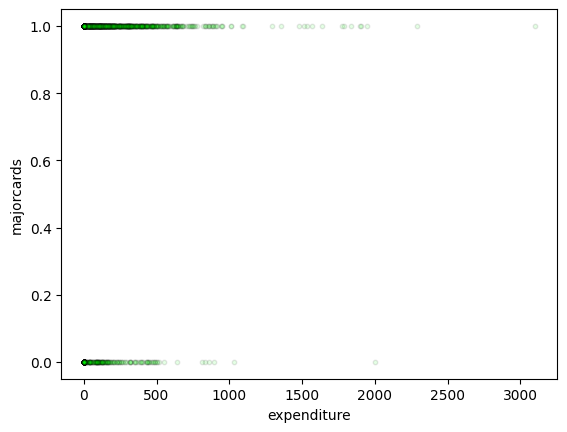

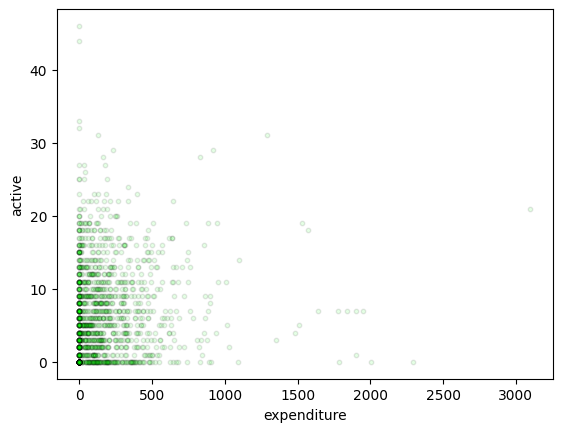

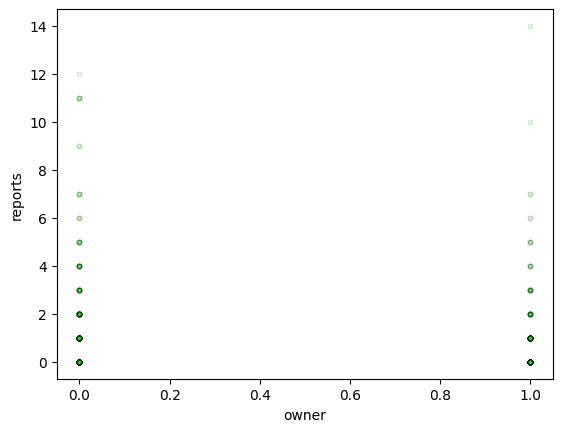

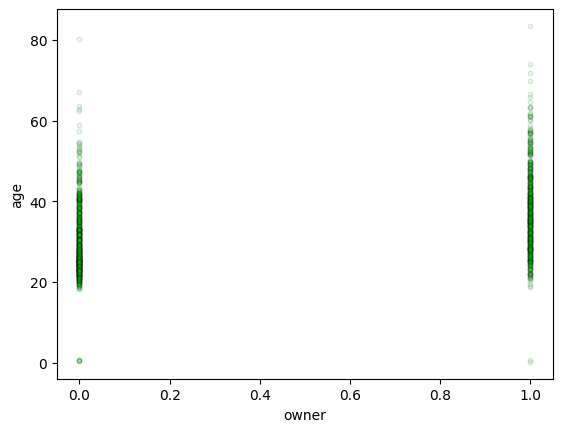

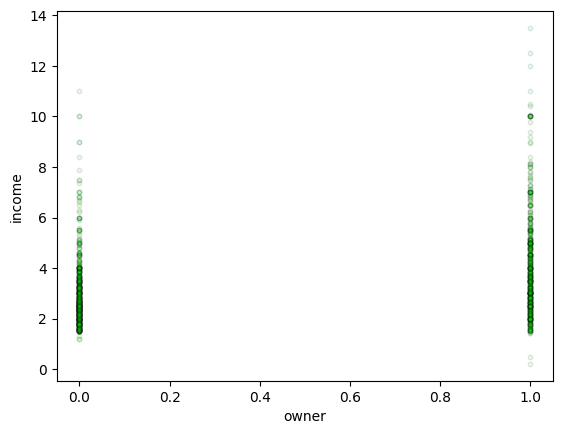

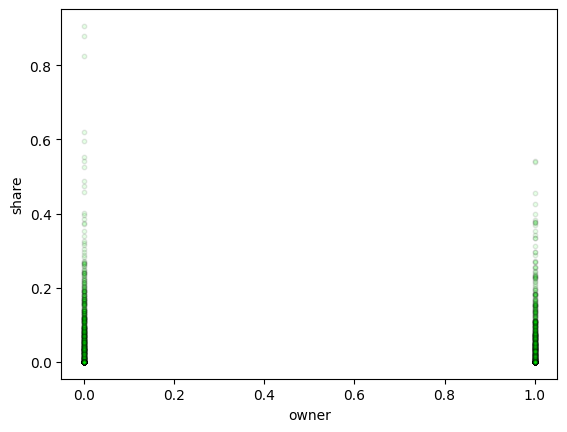

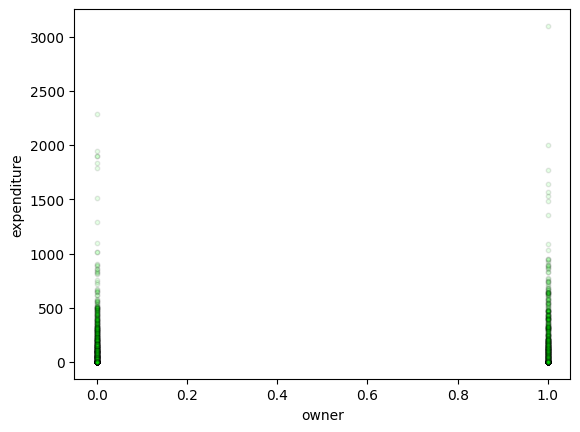

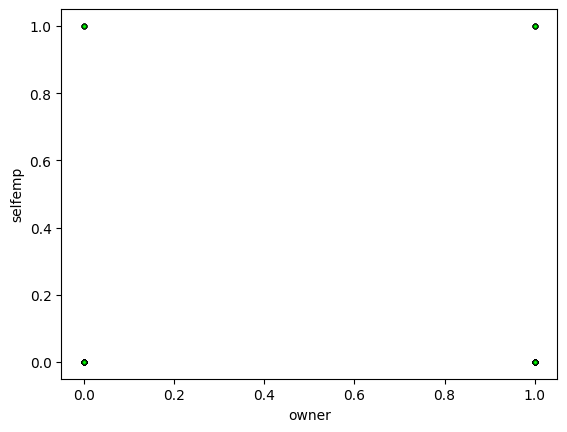

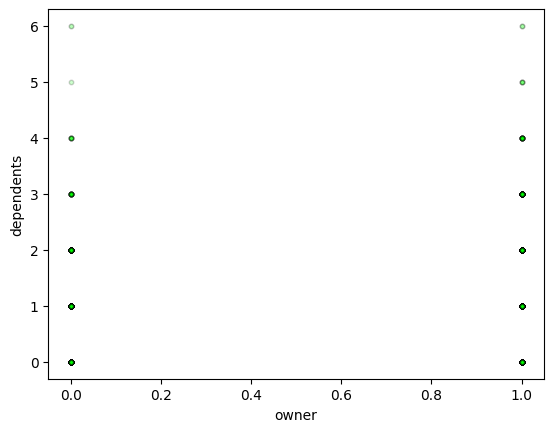

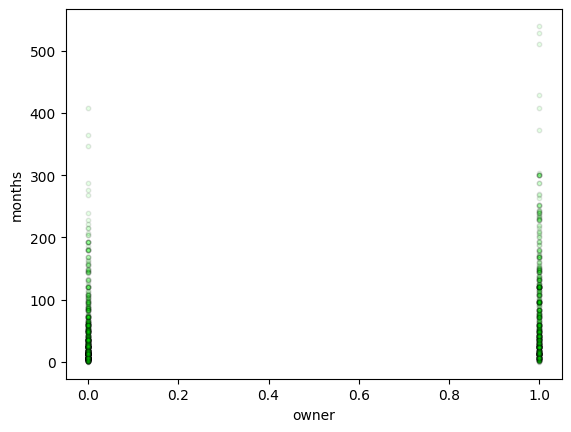

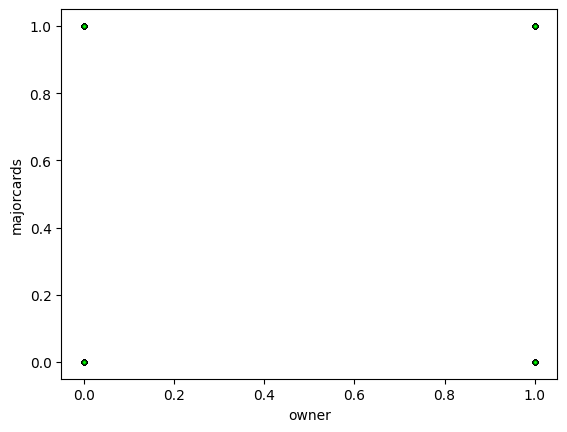

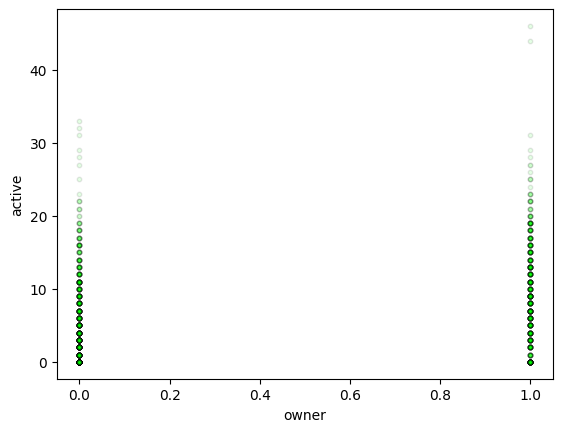

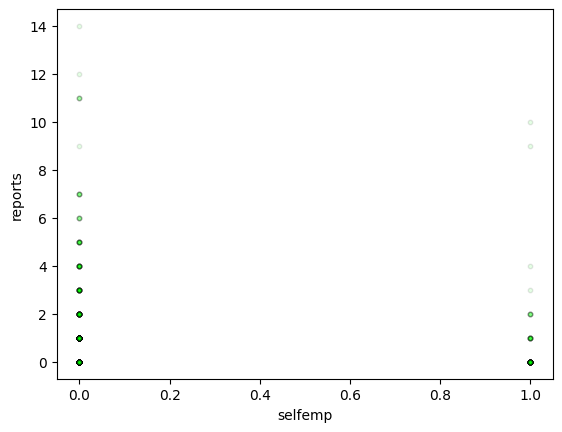

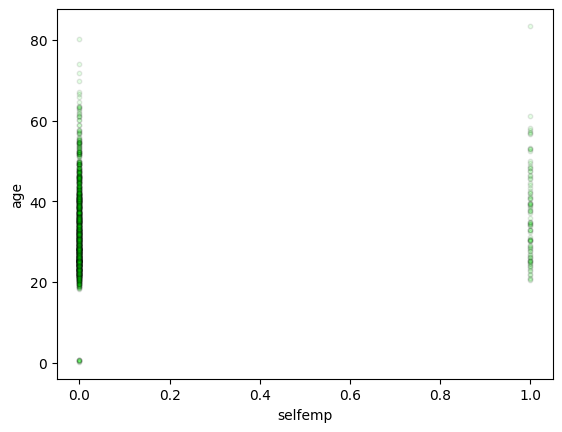

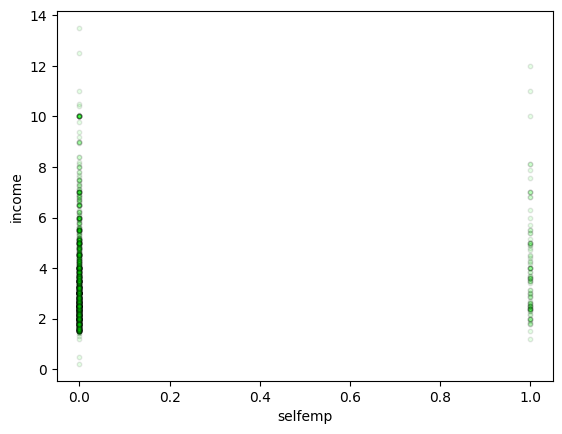

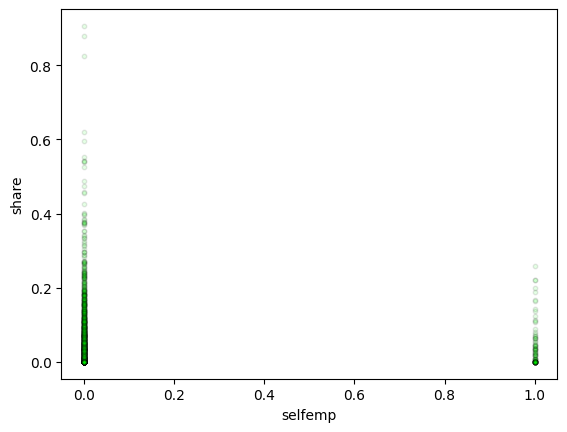

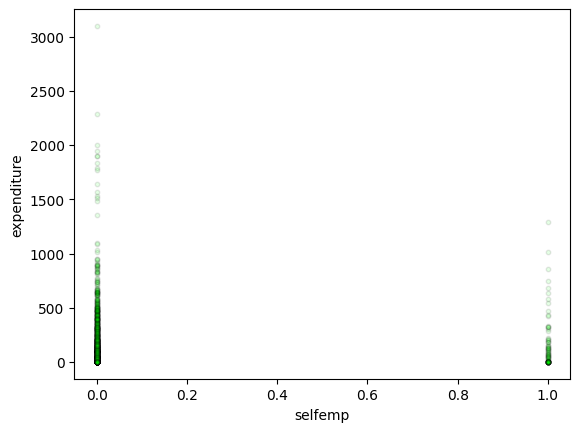

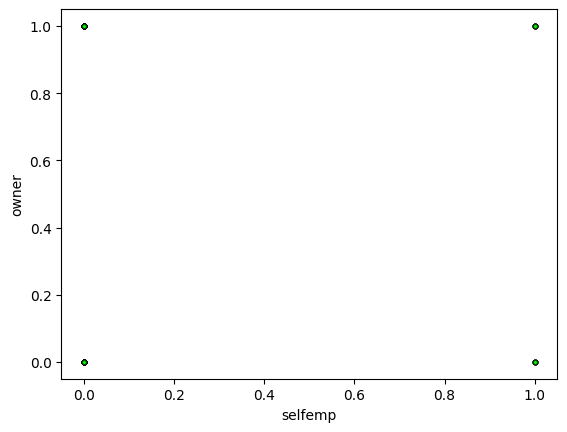

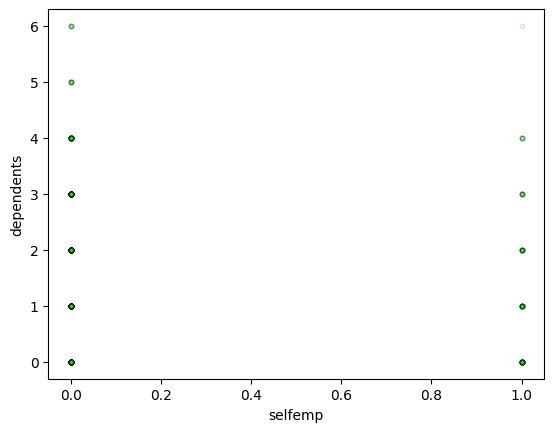

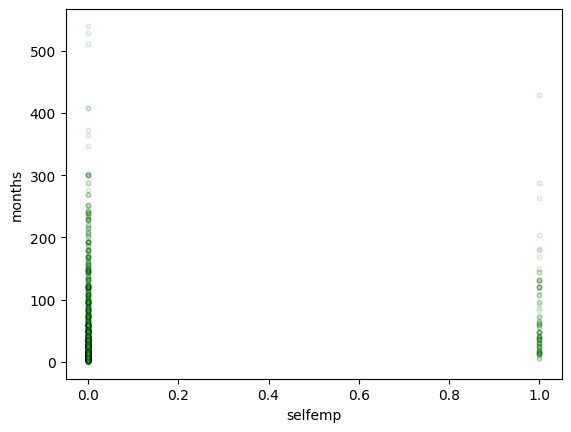

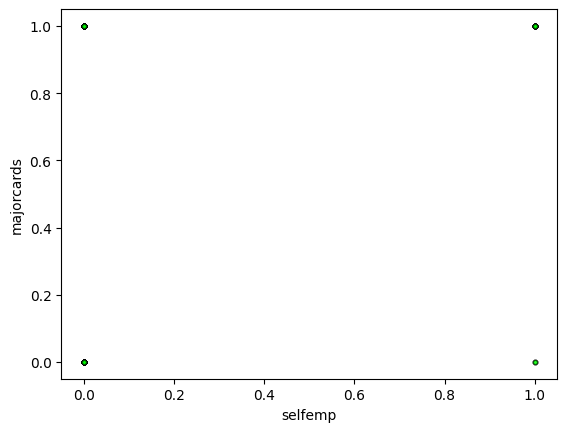

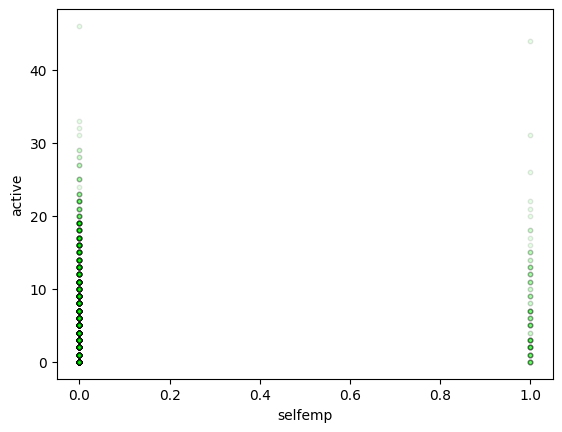

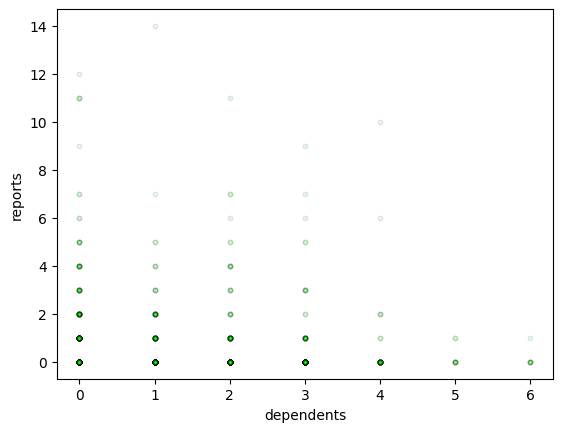

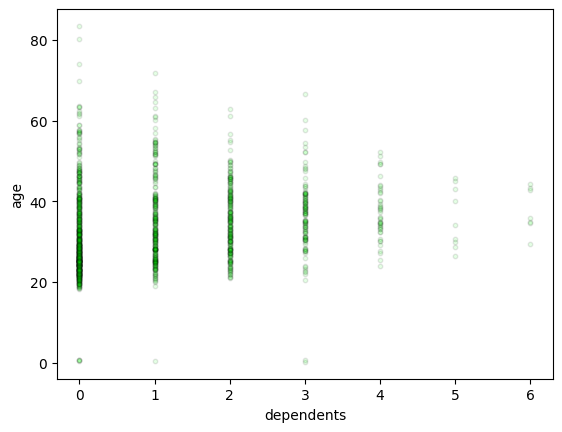

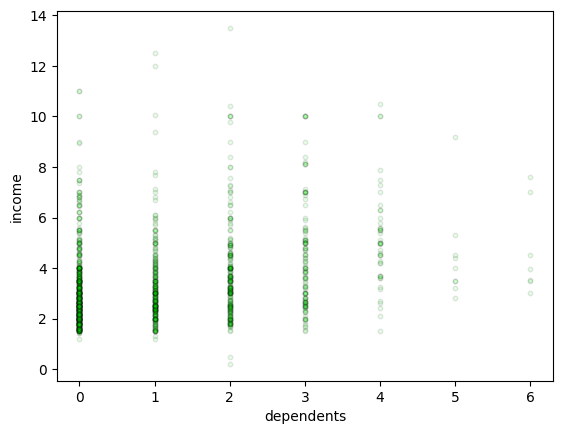

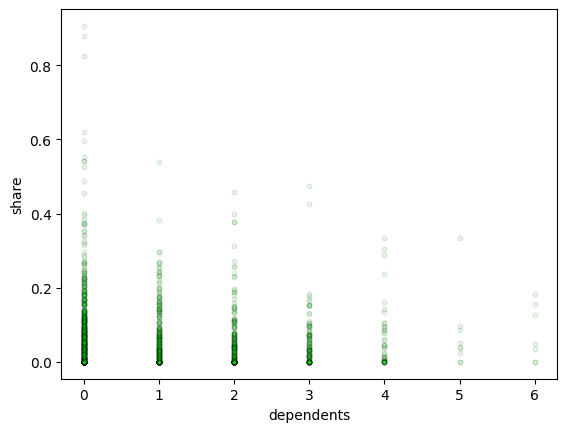

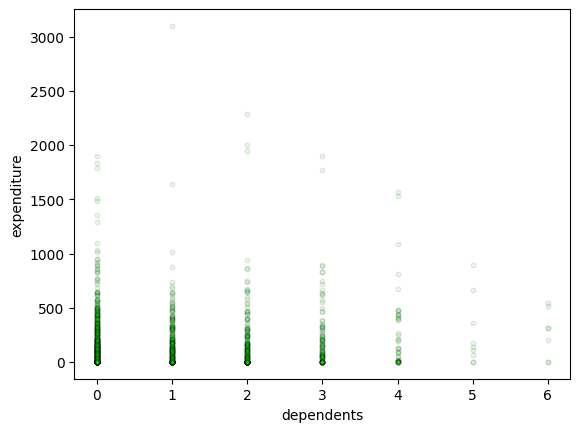

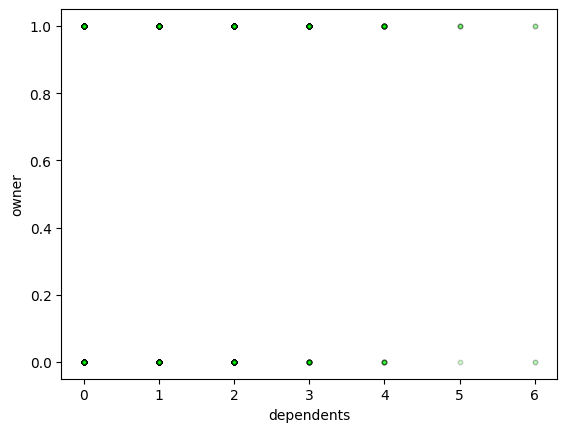

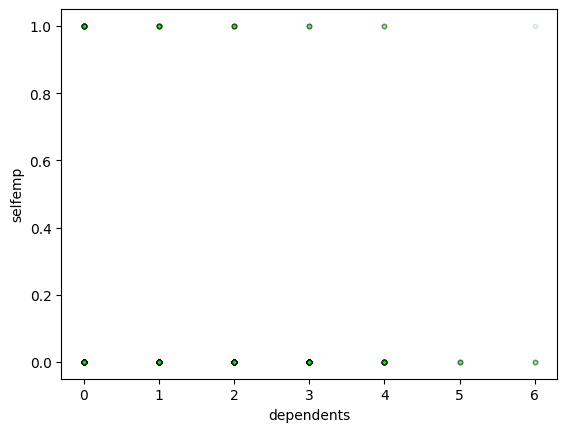

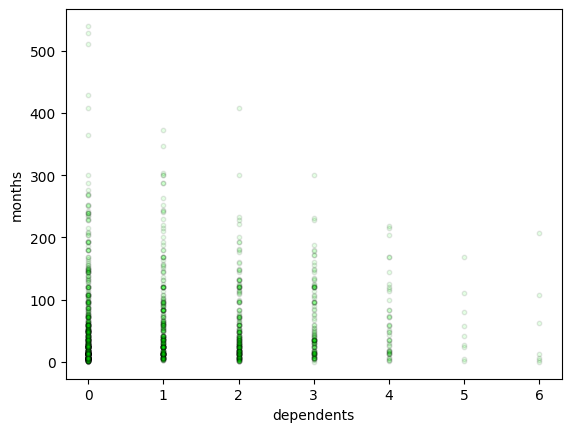

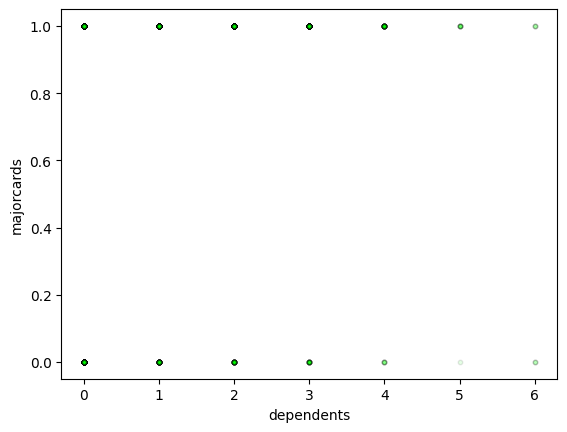

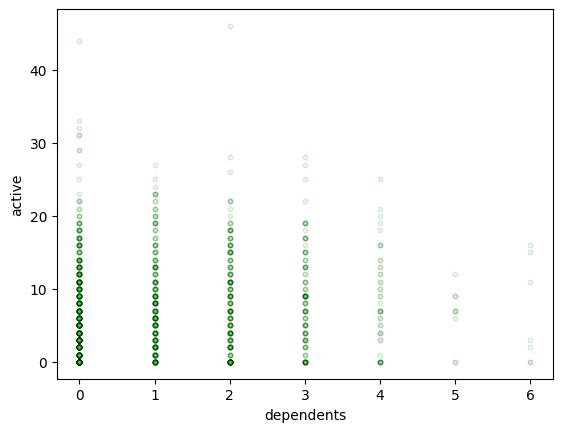

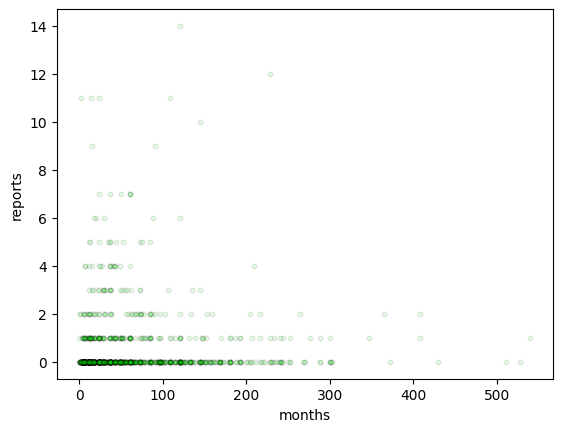

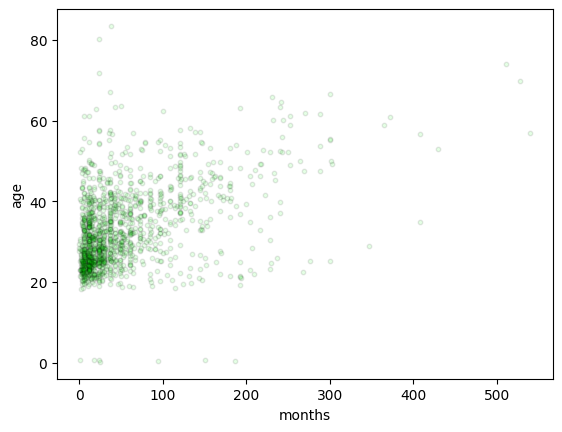

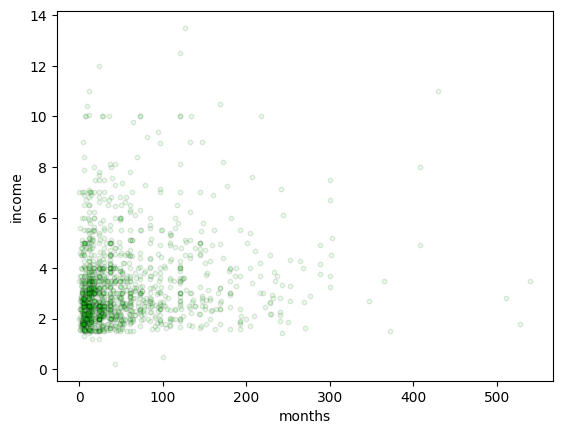

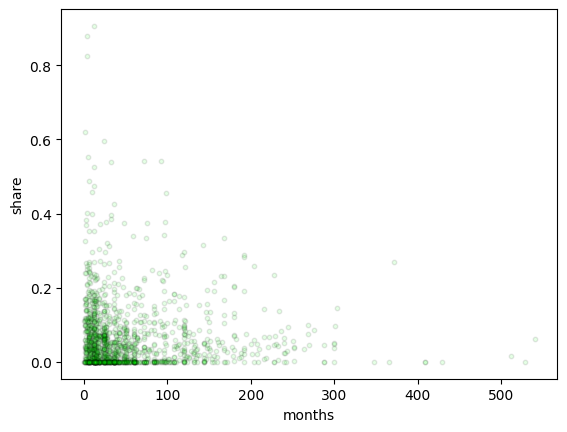

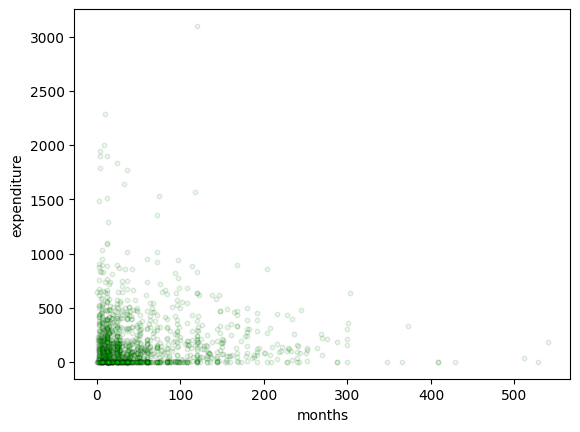

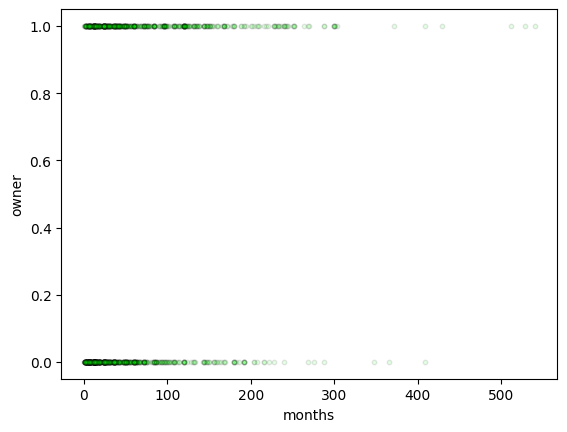

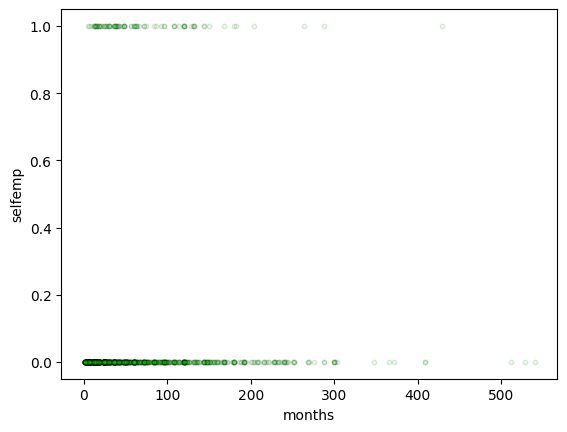

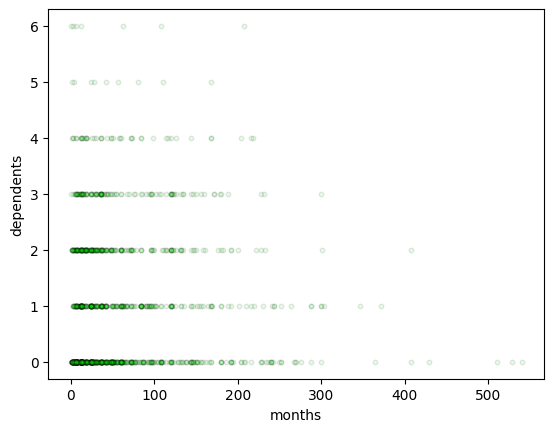

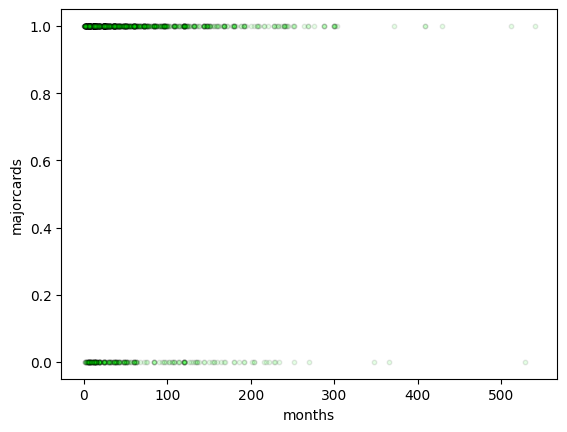

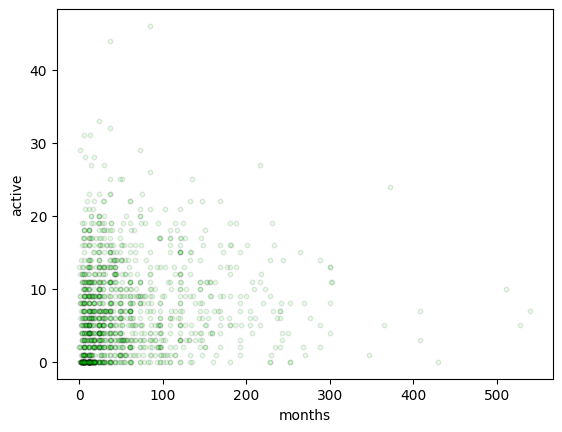

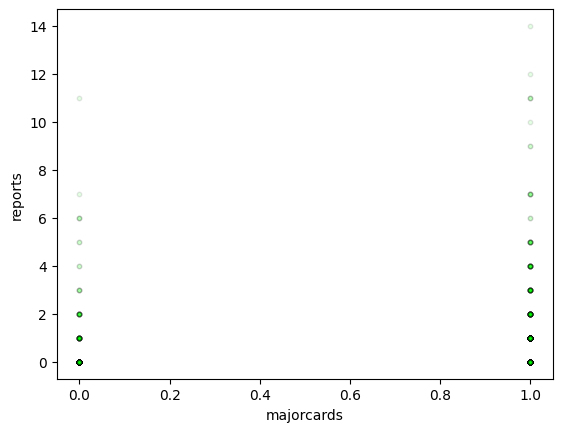

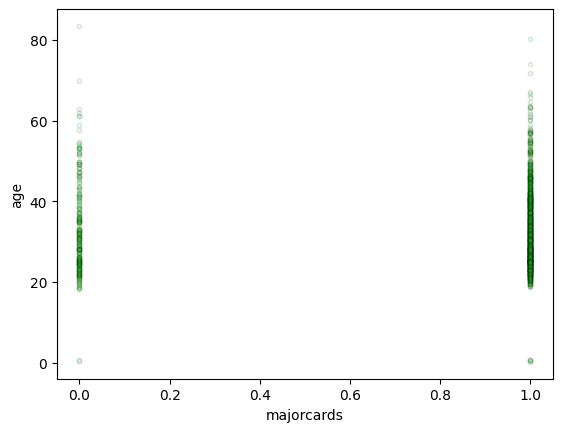

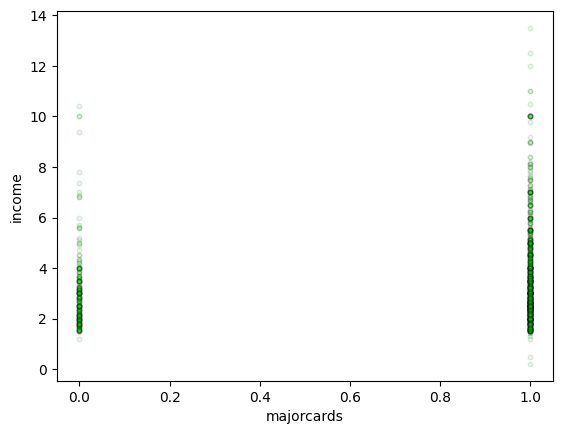

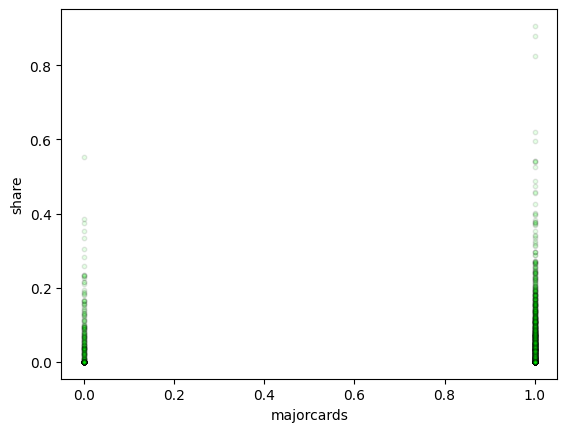

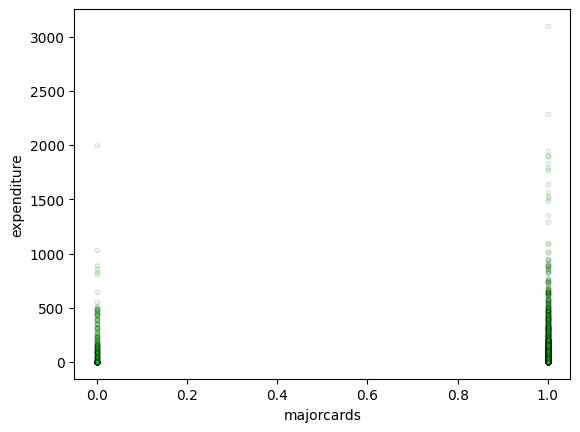

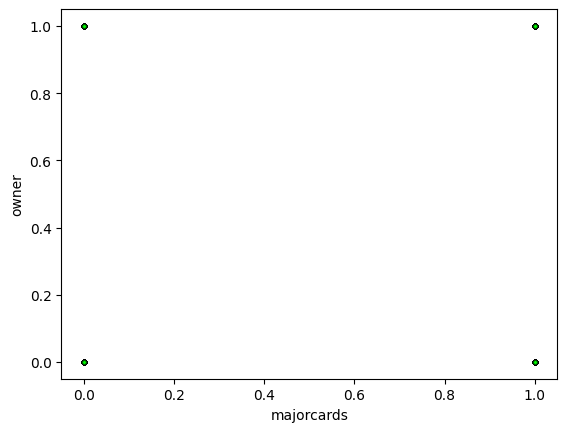

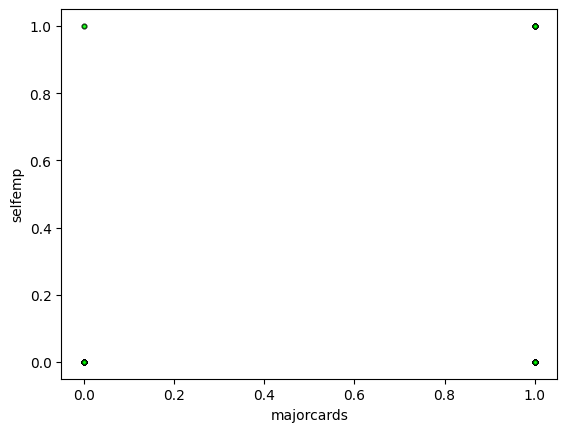

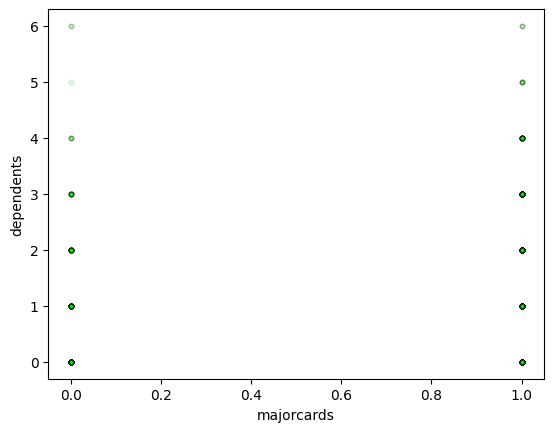

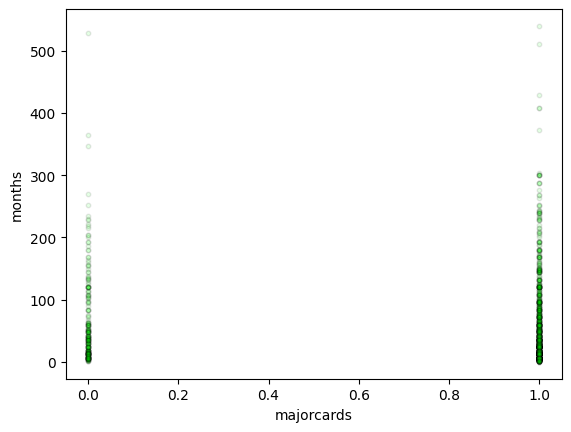

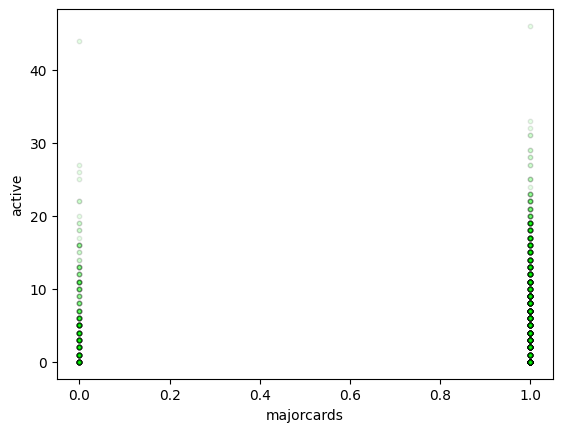

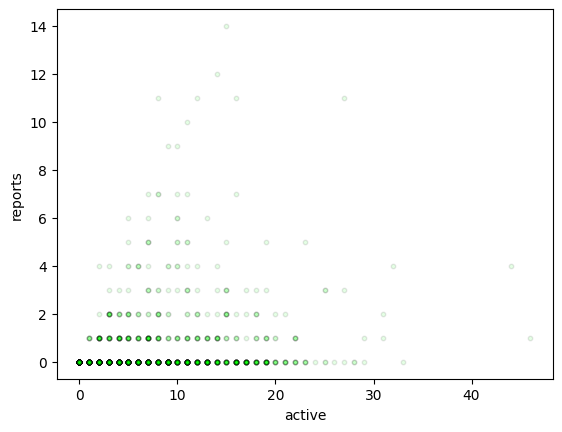

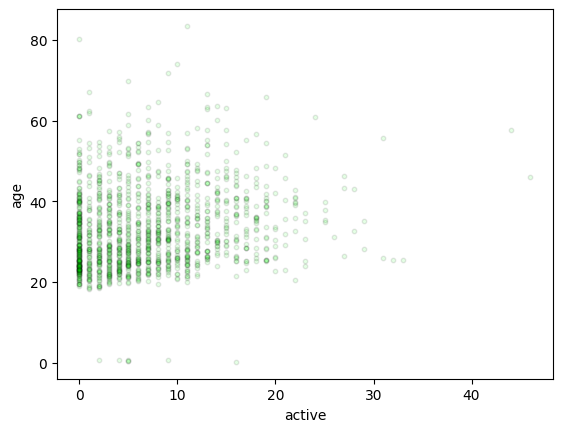

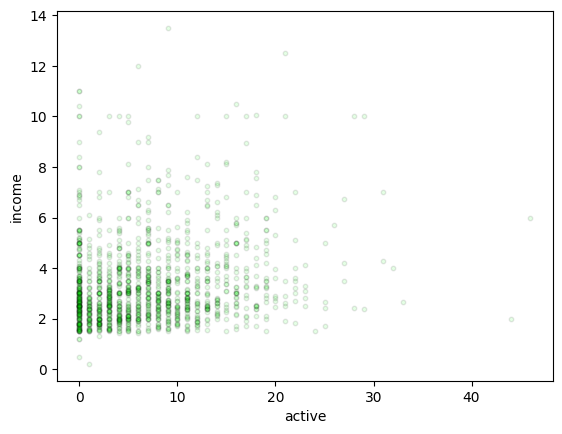

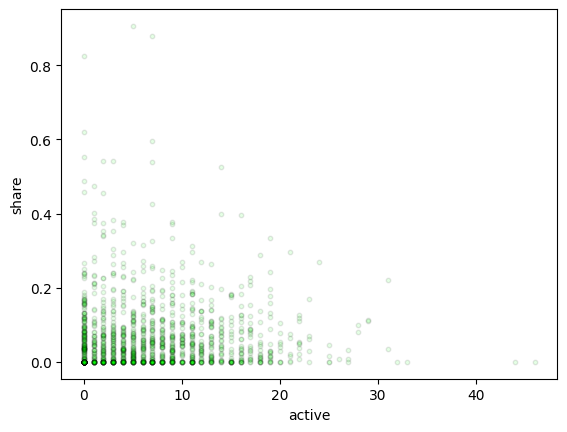

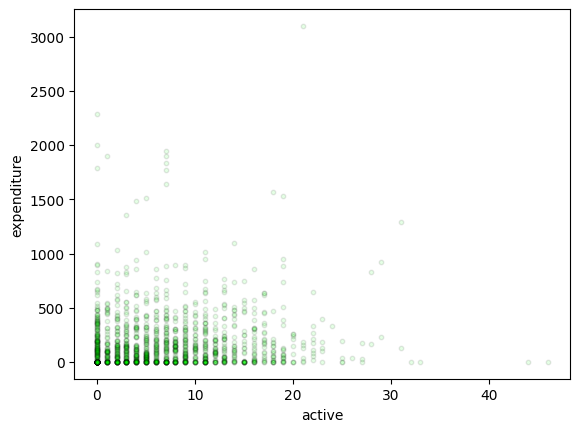

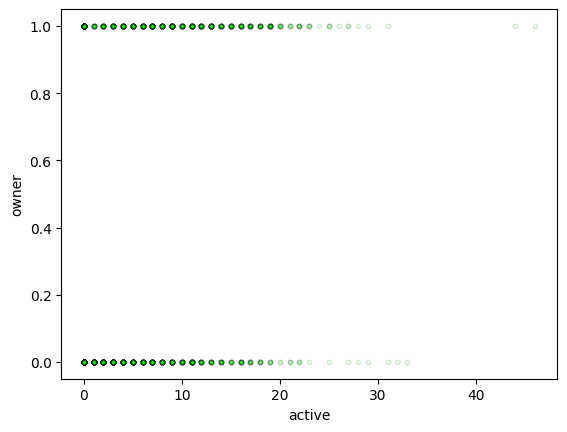

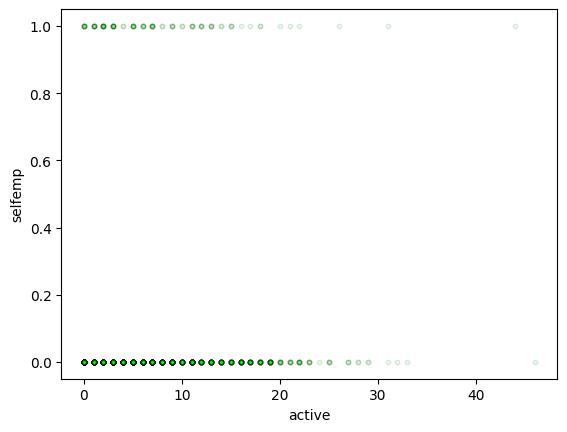

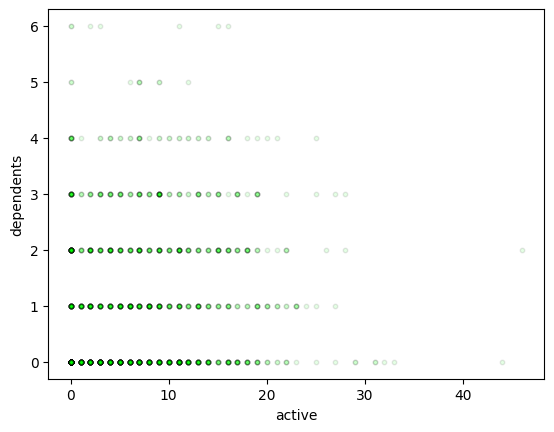

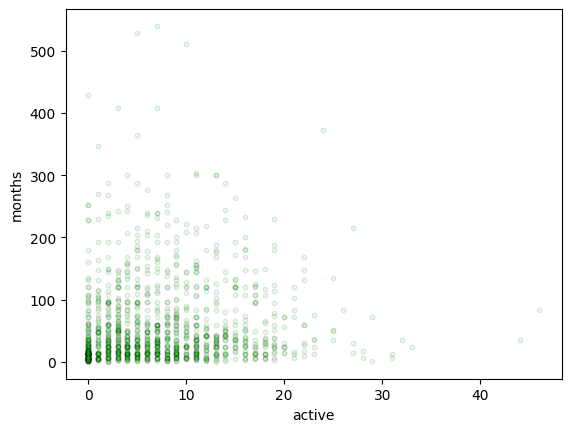

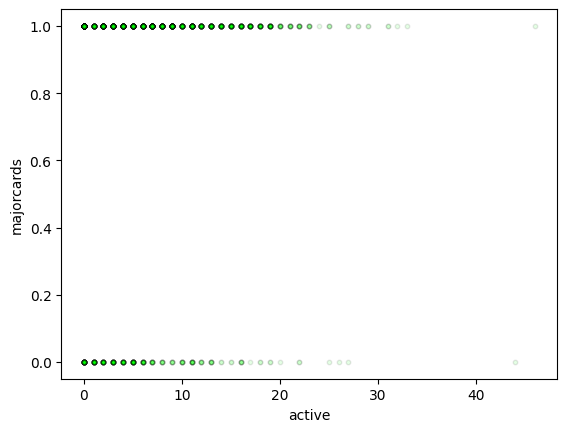

In [83]:
for i in range(len(data_set[0])-1):
  for j in range(len(data_set[0])-1):
    if i != j:
      plt.scatter(data_set[:, i+1], data_set[:, j+1], marker="o", s=10, c = 'lime', edgecolor="k", alpha = 0.1)
      plt.xlabel(df.columns[i+1])
      plt.ylabel(df.columns[j+1])
      plt.pause(0.001)

## Гистограмма распределения

Cтолбцы - гистограмма

Линия - функция плотности

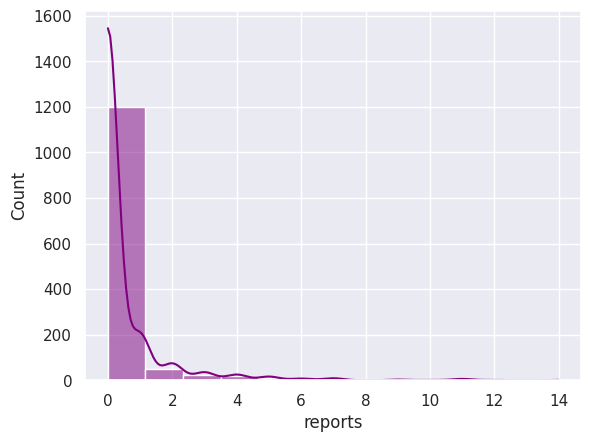

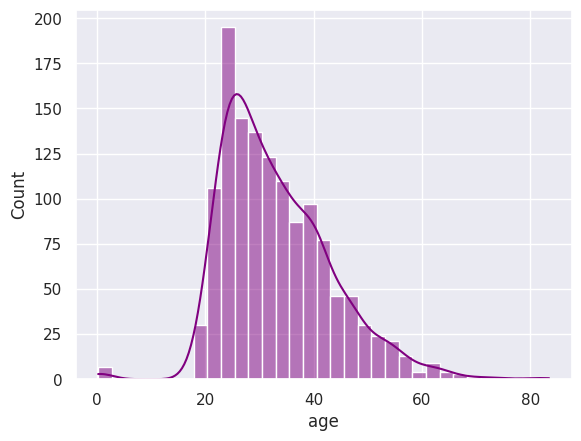

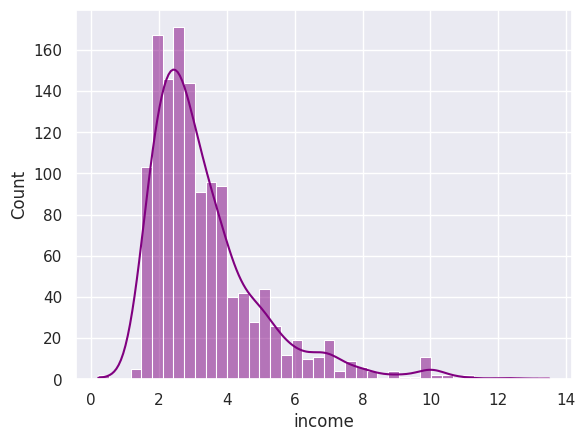

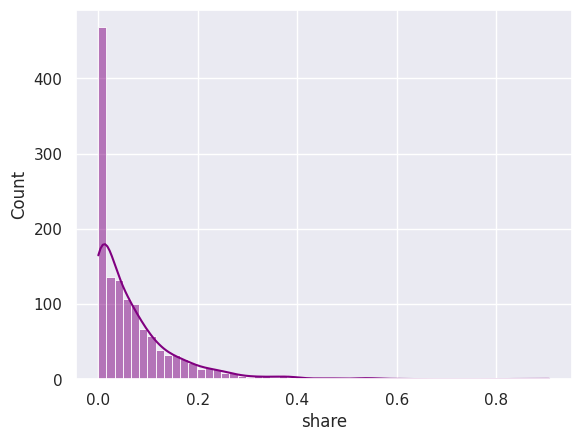

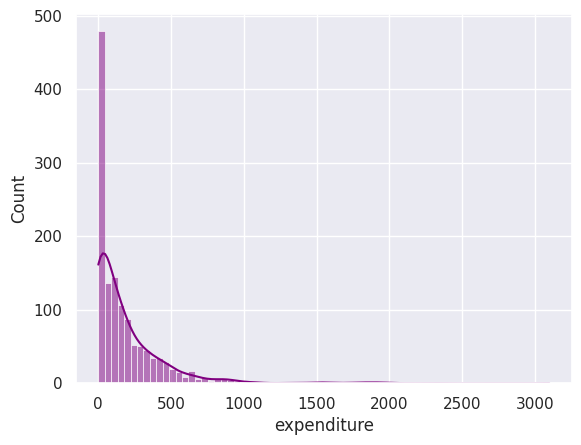

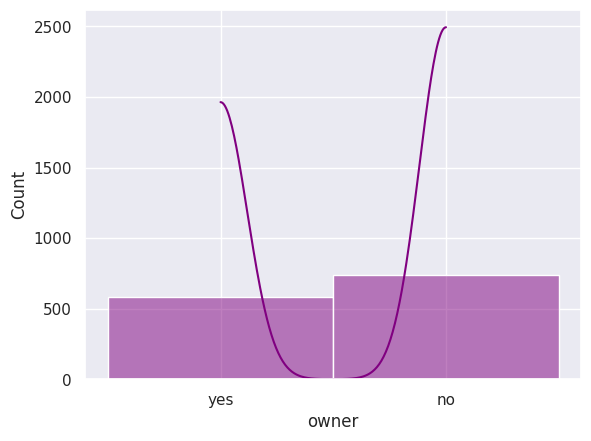

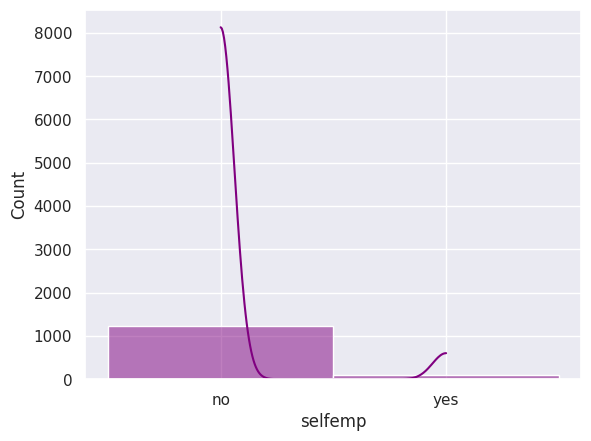

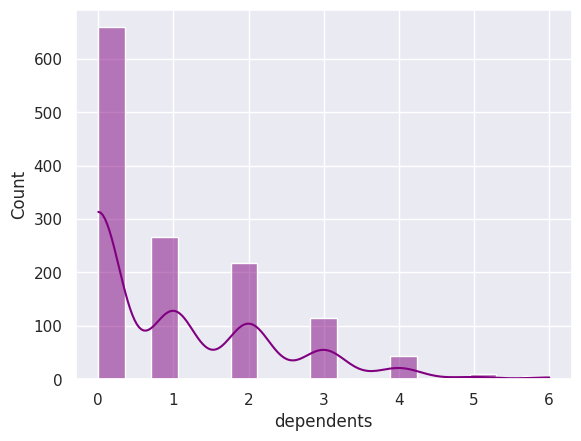

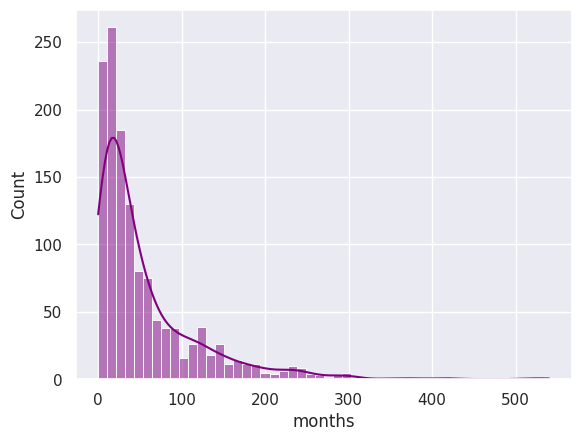

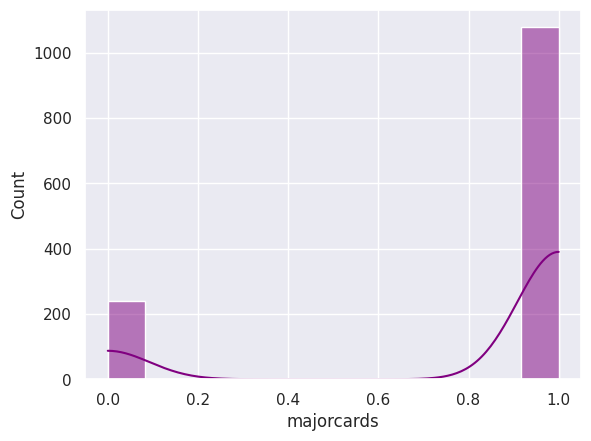

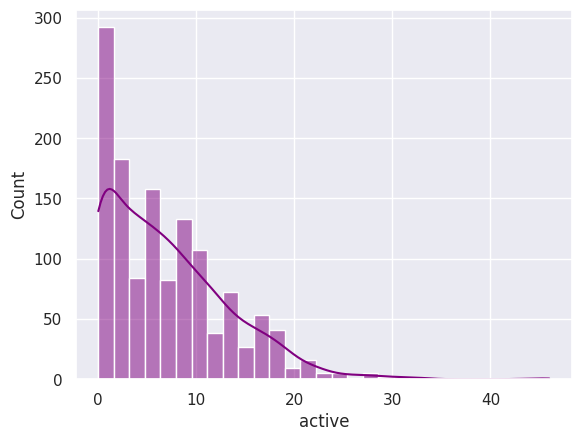

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() # setka

for i in range(len(df.columns)-1): 
  sns.histplot(df[df.columns[i+1]], color='purple', kde=True)
  plt.show()
  plt.pause(0.001)

plt.show()

# 5) Обработать пропущенные значения (или убедиться, что их нет)

вроде нет

# 6) Исключить нерелевантные признаки (объяснить, как вы их нашли)

# 7) Если необходимо, то обработать коррелированные признаки

# 8) Обработать категориальные признаки

# 9) Провести масштабирование (или объяснить, почему в вашем случае она не нужна)

# 10) предобработка

Вам может понадобиться другая предобработка. Например, если в вашем датасете есть текстовые признаки с уникальными значениями (например, аннотации товаров, отзывы пользователей, другие тексты), как в двух последних датасетах из перечисленных, то вам понадобится этап извлечения признаков, т.е. простые методы NLP, как, например, bag-of-words. Воспользуйтесь библиотеками re, nltk

# 11) Контроль

После шагов 5–10 разумно вернутся к шагу 4 (а может, возвращаться к нему после каждого из этапов 5–10.

# 12) Попробуйте как минимум 3 метода классификации (регрессии). Объясните ваш выбор. Найдите значения метрик на обучающей и тестовой выборке. Сделайте вывод.

# 13) На одном из методов (объясните выбор) найдите оптимальное значение параметров. Постройте график зависимости ошибок (на обучающей выборке и валидационной/CV) от значения гиперпарамтра. Для найденного оптимального значения параметра (параметров) снова обучите модель. Сделайте вывод.

# 14) Довольны ли вы результатами? В частности, если классы не сбалансированы, то результат может оказаться неприемлемым. В этом случае можете применить методы балансировки из библиотеки imbalanced-learn

# 15) Общие выводы

# Обработка

из 5-го колаба

In [ ]:
import math
from sklearn.metrics import accuracy_score

def sigmoid(x, w):
       return (1.0 / (1 + np.exp(- x @ w ))).reshape(-1)

def loss(x, y_true, w):
    n = len(y_true)
    sigmoid_result = sigmoid(x, w)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1.0 - y_true) * np.log(1.0 - sigmoid_result)
    for i in range (len(one_class)):
      if math.isnan(one_class[i]) == 1:
        one_class[i] = 0.0
    #for i in range (len(one_class)):
      #if math.isnan(zero_class[i]) == 0:
        #zero_class[i] = 0.0    
    assert y_true.shape == zero_class.shape, '{} != {}'.format(y_true.shape, zero_class.shape)
    assert y_true.shape == one_class.shape, '{} != {}'.format(y_true.shape, one_class.shape)

    logloss = np.sum(zero_class + one_class) / n
    return -logloss


# на входе: x_shape: [n_samples, n_features +1]
# на выходе: [grad_w0, grad_w1,..., grad_w_(n_features)] | out_shape: (n_features +1) 
# для этого
# (n_features +1,m) х (m,1) = (n_features +1) 
# под m у нас?
# (y_true - sigmoid_result) размерности (n_samples,1)
# мы делали (1, n_samples) х (n_samples, n_features) = (n_features +1)
# получается, что мб m = n_samples   
def loss_grad(x, y_true, w):
    n = len(y_true)
    sigmoid_result = sigmoid(x, w)

    grad = (x.T @  -(y_true - sigmoid_result)) / n 
    # grad *= 2 * alpha * ()

    return grad

# Функция делает сравнение sigmoid(x, w) > 0.5, если True, то берет первое занчение(1), иначе - второе (0)
def prediction(x, w): 
    return np.where(sigmoid(x, w) > 0.5, 1, 0)

def gradient_descent(X_train, y_train, X_test, y_test, epochs=10, lr=0.001): # изменили количество аргументов 
    _, n_features = X_train.shape
    w = np.zeros((n_features + 1))
# см выше пример
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    loss_train = []
    loss_test = []


    print(prediction(X_test, w))
    print(y_test)
    accuracy_test = [accuracy_score(y_test, prediction(X_test, w))] # смотрим accuracy на каждом шагу

    epoch = 0
    while epoch < epochs:

        grad = loss_grad(X_train, y_train, w) 

        loss_train.append(loss(X_train, y_train, w))
        loss_test.append(loss(X_test, y_test, w))
 
        # добавили accuracy
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w)))
        w -= lr * grad


        epoch += 1
    return w, loss_train, loss_test, accuracy_test

In [ ]:
w, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=10000)

Text(0, 0.5, 'Loss')

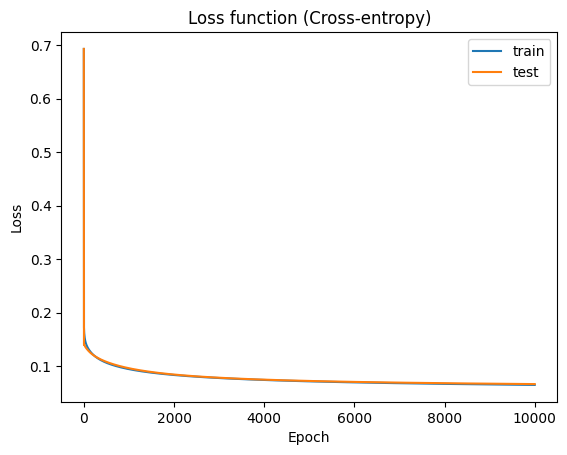

In [ ]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

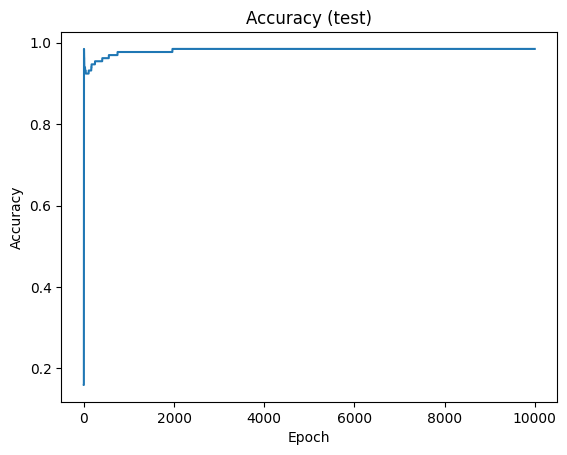

In [ ]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
X_test_stacked = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [ ]:
pred = prediction(X_test_stacked, w)

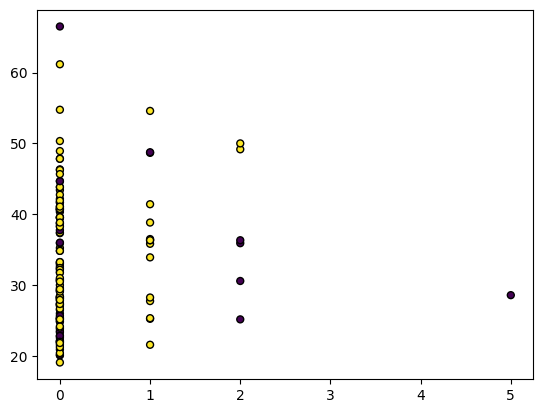

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=pred, s=25, edgecolor="k")

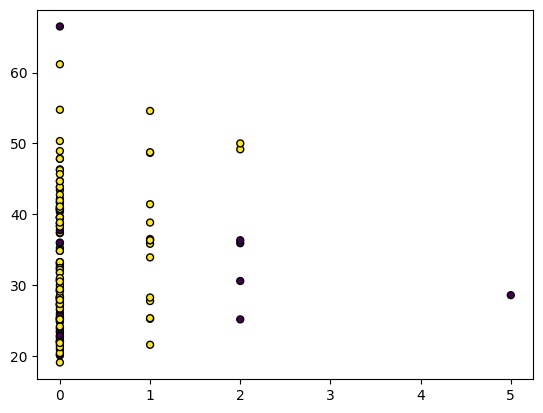

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")

In [ ]:
def check(pred, y_test):
  k = 0
  for i in range(len(pred)):
    if pred[i]!= y_test[i]:
      k+=1
  return k

In [ ]:
check(pred, y_test)

2

In [ ]:
X = X_train
y = y_train

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(C=1, random_state=42)
clf.fit(X, y)

SVC(C=1, random_state=42)

In [ ]:
pred_1 = clf.predict(X_test)

Acuraccy

In [ ]:
clf.score(X_test, y_test)

0.9166666666666666

In [ ]:
check(pred_1, y_test)

11

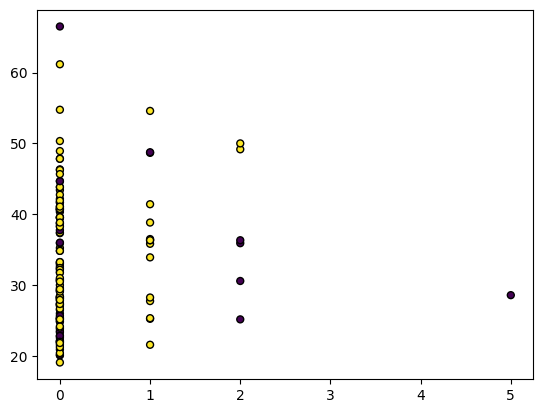

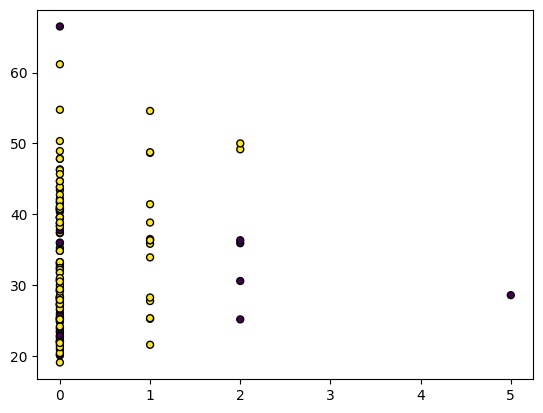

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=pred, s=25, edgecolor="k")
plt.pause(0.001)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")